# Data Collection

In [1]:
#Loading data
import pandas as pd

#Loading the data from a CSV file
df1 = pd.read_csv("/kaggle/input/dataset2/Synthesized_Dataset.csv", low_memory=False)
print("Data Loaded Successfully!")

Data Loaded Successfully!


In [2]:
# Create a copy of original Dataset
df=df1.copy()
df.head()

,Unnamed: 0,Protocol,Flow Duration,Total Fwd Packets,Total Backward Packets,Fwd Packets Length Total,Bwd Packets Length Total,Fwd Packet Length Max,Fwd Packet Length Min,Fwd Packet Length Mean,...,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Label,Class
0,281335,17,1,199,0,89381.0,28.0,440.0,440.0,442.470429,...,764.275152,299.351195,345.0,0.0,0.000000e+00,0.000000e+00,5535.0,17659.0,LDAP,Attack
1,95434,17,2980687,4,0,2770.0,0.0,516.0,515.0,516.010583,...,124.375520,319.796549,58.0,0.0,0.000000e+00,0.000000e+00,12618.0,15075.0,TFTP,Attack
2,306200,6,1,4,0,0.0,0.0,32.0,1.0,38.544196,...,572.925393,413.826761,220.0,57.0,0.000000e+00,0.000000e+00,0.0,5735.0,Benign,Benign
3,69820,6,37318940,13,6,205.0,0.0,0.0,4.0,5.984880,...,218.139032,188.916260,0.0,0.0,1.015952e+07,4.550064e+06,13765031.0,6928193.0,Syn,Attack
4,102151,6,1,1,2,548.0,0.0,0.0,1.0,1.004430,...,359.785377,213.842743,163.0,0.0,0.000000e+00,0.000000e+00,0.0,0.0,Benign,Benign


In [3]:
import numpy as np

#Library for random number generation
import random
np.random.seed(42)
random.seed(42)

In [4]:
# Rename Unnamed Columns (Identified Unnamed for SNO)
df.rename(columns={col: "SNO" for col in df.columns if col.startswith("Unnamed")}, inplace=True)

# Display the DataFrame with the renamed column
print("\nDataFrame with renamed column:")
df.head()


DataFrame with renamed column:


,SNO,Protocol,Flow Duration,Total Fwd Packets,Total Backward Packets,Fwd Packets Length Total,Bwd Packets Length Total,Fwd Packet Length Max,Fwd Packet Length Min,Fwd Packet Length Mean,...,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Label,Class
0,281335,17,1,199,0,89381.0,28.0,440.0,440.0,442.470429,...,764.275152,299.351195,345.0,0.0,0.000000e+00,0.000000e+00,5535.0,17659.0,LDAP,Attack
1,95434,17,2980687,4,0,2770.0,0.0,516.0,515.0,516.010583,...,124.375520,319.796549,58.0,0.0,0.000000e+00,0.000000e+00,12618.0,15075.0,TFTP,Attack
2,306200,6,1,4,0,0.0,0.0,32.0,1.0,38.544196,...,572.925393,413.826761,220.0,57.0,0.000000e+00,0.000000e+00,0.0,5735.0,Benign,Benign
3,69820,6,37318940,13,6,205.0,0.0,0.0,4.0,5.984880,...,218.139032,188.916260,0.0,0.0,1.015952e+07,4.550064e+06,13765031.0,6928193.0,Syn,Attack
4,102151,6,1,1,2,548.0,0.0,0.0,1.0,1.004430,...,359.785377,213.842743,163.0,0.0,0.000000e+00,0.000000e+00,0.0,0.0,Benign,Benign


#Exploratory Data Analysis (EDA)

1. Understanding Data

In [5]:
# Shape of dataset(Rows and Column's)
print("Shape of Dataset: ", df.shape)

Shape of Dataset:  (431371, 80)


In [6]:
# Columns List
print("Columns in the dataset:")
print(df.columns.tolist())

Columns in the dataset:
['SNO', 'Protocol', 'Flow Duration', 'Total Fwd Packets', 'Total Backward Packets', 'Fwd Packets Length Total', 'Bwd Packets Length Total', 'Fwd Packet Length Max', 'Fwd Packet Length Min', 'Fwd Packet Length Mean', 'Fwd Packet Length Std', 'Bwd Packet Length Max', 'Bwd Packet Length Min', 'Bwd Packet Length Mean', 'Bwd Packet Length Std', 'Flow Bytes/s', 'Flow Packets/s', 'Flow IAT Mean', 'Flow IAT Std', 'Flow IAT Max', 'Flow IAT Min', 'Fwd IAT Total', 'Fwd IAT Mean', 'Fwd IAT Std', 'Fwd IAT Max', 'Fwd IAT Min', 'Bwd IAT Total', 'Bwd IAT Mean', 'Bwd IAT Std', 'Bwd IAT Max', 'Bwd IAT Min', 'Fwd PSH Flags', 'Bwd PSH Flags', 'Fwd URG Flags', 'Bwd URG Flags', 'Fwd Header Length', 'Bwd Header Length', 'Fwd Packets/s', 'Bwd Packets/s', 'Packet Length Min', 'Packet Length Max', 'Packet Length Mean', 'Packet Length Std', 'Packet Length Variance', 'FIN Flag Count', 'SYN Flag Count', 'RST Flag Count', 'PSH Flag Count', 'ACK Flag Count', 'URG Flag Count', 'CWE Flag Count'

In [7]:
# Information
# Display basic information about the dataset
print("Dataset Overview:")
df.info()

Dataset Overview:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 431371 entries, 0 to 431370
Data columns (total 80 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   SNO                       431371 non-null  int64  
 1   Protocol                  431371 non-null  int64  
 2   Flow Duration             431371 non-null  int64  
 3   Total Fwd Packets         431371 non-null  int64  
 4   Total Backward Packets    431371 non-null  int64  
 5   Fwd Packets Length Total  431371 non-null  float64
 6   Bwd Packets Length Total  431371 non-null  float64
 7   Fwd Packet Length Max     431371 non-null  float64
 8   Fwd Packet Length Min     431371 non-null  float64
 9   Fwd Packet Length Mean    431371 non-null  float64
 10  Fwd Packet Length Std     431371 non-null  float64
 11  Bwd Packet Length Max     431371 non-null  float64
 12  Bwd Packet Length Min     431371 non-null  float64
 13  Bwd Packet Length Mean    

In [8]:
# Describe
print("\nSummary Statistics:")
print(df.describe())


Summary Statistics:
                 SNO       Protocol  Flow Duration  Total Fwd Packets  \
count  431371.000000  431371.000000   4.313710e+05      431371.000000   
mean   129754.584508      12.908030   8.656436e+06          24.652211   
std     83427.211508       5.451416   2.235744e+07          46.524093   
min         0.000000       0.000000   1.000000e+00           1.000000   
25%     60974.000000       6.000000   1.000000e+00           3.000000   
50%    113892.000000      17.000000   3.421000e+03           5.000000   
75%    191993.500000      17.000000   2.991350e+06          15.000000   
max    306200.000000      17.000000   1.199724e+08         250.000000   

       Total Backward Packets  Fwd Packets Length Total  \
count           431371.000000             431371.000000   
mean                 2.716237               8860.104235   
std                  9.535638              18808.428421   
min                  0.000000                  0.000000   
25%                  0.000

In [9]:
# Distribution of Label and Class Columns (Text)

# 1. Print Names of Columns in dataset
print("\nClass Distribution:")
print(df['Class'].value_counts())

print("\nLabel Distribution:")
print(df['Label'].value_counts())

print("\n")

# 2. Print Unique values in 'Class' & 'Label' column
print(f"\nUnique values in 'Class': {df['Class'].nunique()}")
print(f"Unique values in 'Label': {df['Label'].nunique()}")


Class Distribution:
Class
Attack    295135
Benign    136236
Name: count, dtype: int64

Label Distribution:
Label
Benign           134149
DrDoS_NTP        100103
TFTP              79697
Syn               49907
UDP               12809
DrDoS_UDP         11900
DrDoS_MSSQL       10849
UDP-lag            7809
MSSQL              6287
DrDoS_SNMP         4105
DrDoS_DNS          3832
LDAP               2652
DrDoS_LDAP         2501
Portmap            1319
DrDoS_NetBIOS      1093
NetBIOS            1074
UDPLag              663
WebDDoS             622
Name: count, dtype: int64



Unique values in 'Class': 2
Unique values in 'Label': 18


2. Descriptive Statistics

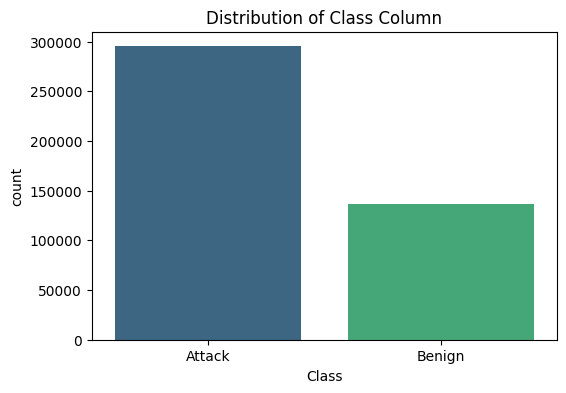

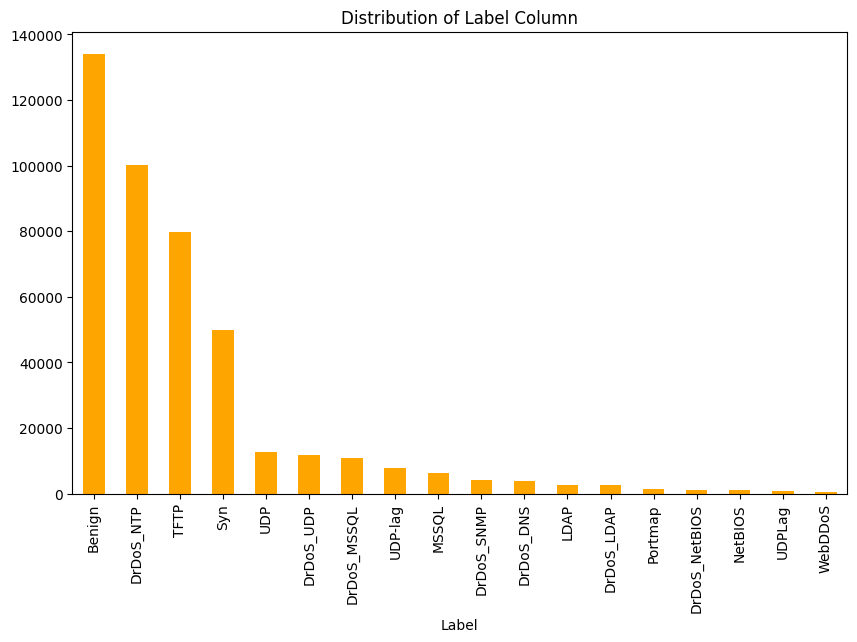




Categorical Columns: ['Label', 'Class']
Numerical Columns: ['SNO', 'Protocol', 'Flow Duration', 'Total Fwd Packets', 'Total Backward Packets', 'Fwd Packets Length Total', 'Bwd Packets Length Total', 'Fwd Packet Length Max', 'Fwd Packet Length Min', 'Fwd Packet Length Mean', 'Fwd Packet Length Std', 'Bwd Packet Length Max', 'Bwd Packet Length Min', 'Bwd Packet Length Mean', 'Bwd Packet Length Std', 'Flow Bytes/s', 'Flow Packets/s', 'Flow IAT Mean', 'Flow IAT Std', 'Flow IAT Max', 'Flow IAT Min', 'Fwd IAT Total', 'Fwd IAT Mean', 'Fwd IAT Std', 'Fwd IAT Max', 'Fwd IAT Min', 'Bwd IAT Total', 'Bwd IAT Mean', 'Bwd IAT Std', 'Bwd IAT Max', 'Bwd IAT Min', 'Fwd PSH Flags', 'Bwd PSH Flags', 'Fwd URG Flags', 'Bwd URG Flags', 'Fwd Header Length', 'Bwd Header Length', 'Fwd Packets/s', 'Bwd Packets/s', 'Packet Length Min', 'Packet Length Max', 'Packet Length Mean', 'Packet Length Std', 'Packet Length Variance', 'FIN Flag Count', 'SYN Flag Count', 'RST Flag Count', 'PSH Flag Count', 'ACK Flag Coun

/usr/local/lib/python3.10/dist-packages/matplotlib/colors.py:721: RuntimeWarning: invalid value encountered in less
  xa[xa < 0] = -1


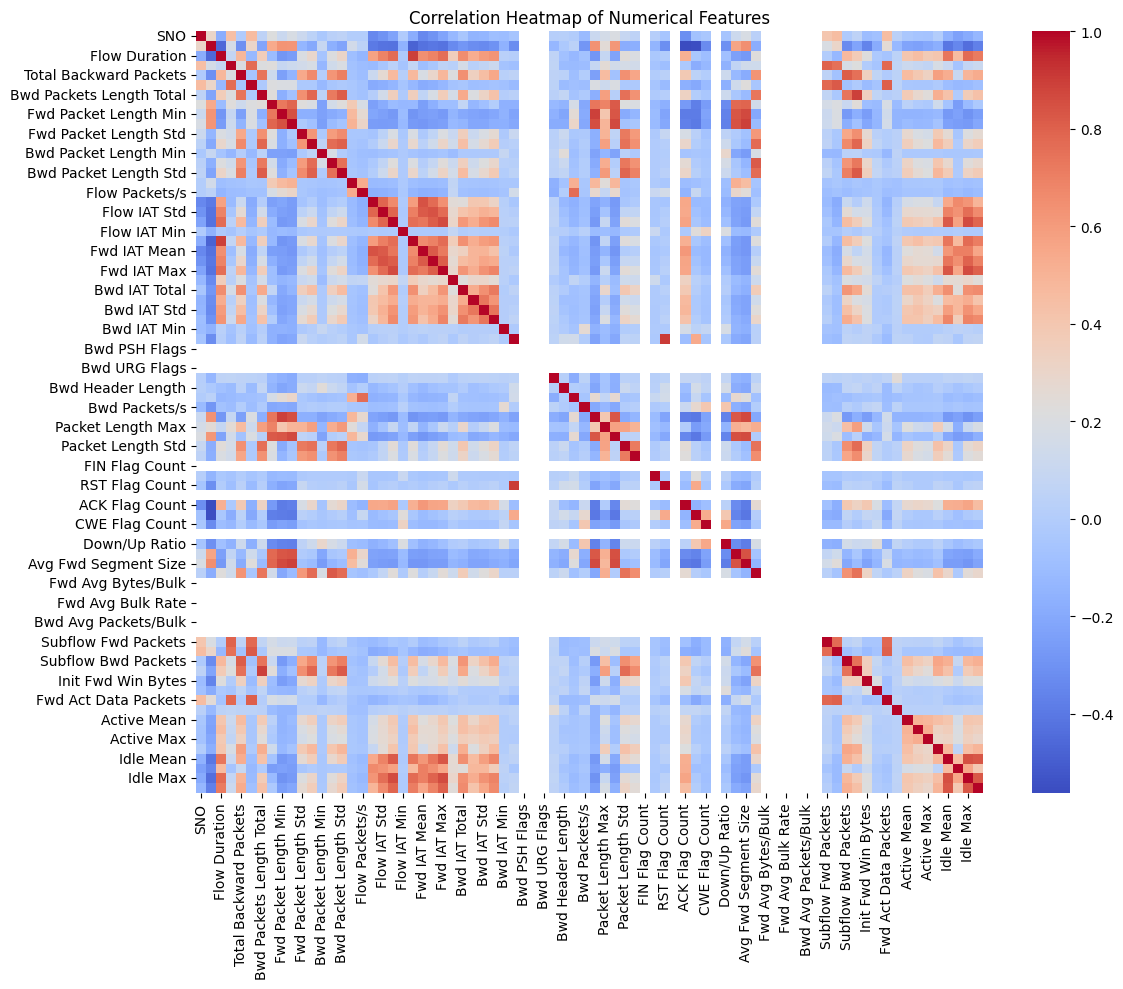

In [10]:
# Distribution of Label and Class Columns (Visual)

# 1. Distribution of the 'Class'& 'Label' column
import matplotlib.pyplot as plt
import seaborn as sns

#Class
plt.figure(figsize=(6, 4))
sns.countplot(data=df, x='Class', palette='viridis')
plt.title('Distribution of Class Column')
plt.show()

#Label
plt.figure(figsize=(10, 6))
df['Label'].value_counts().plot(kind='bar', color='orange')
plt.title('Distribution of Label Column')
plt.show()

print("\n")

# 2. Separate categorical and numerical columns
categorical_columns = df.select_dtypes(exclude=[np.number]).columns.tolist()
numerical_columns = df.select_dtypes(include=[np.number]).columns.tolist()

# In Text Categorical & Numerical Columns
print(f"\nCategorical Columns: {list(categorical_columns)}")
print(f"Numerical Columns: {list(numerical_columns)}")

print("\n")

'''
import matplotlib.pyplot as plt
%matplotlib inline

# Plotting the data distribution using Histograms
df1.hist(bins = 50,figsize = (20,20))
plt.show()
'''
print("\n")

# 3. Correlation Analysis: Heatmap
print("Generating Correlation Heatmap for Numerical Columns...")
plt.figure(figsize=(12, 10))
correlation_matrix = df[numerical_columns].corr()
sns.heatmap(correlation_matrix, annot=False, cmap='coolwarm', cbar=True)
plt.title('Correlation Heatmap of Numerical Features')
plt.tight_layout()
plt.show()

# Data Pre-Processing

In [11]:
# Handle Missing Values
print("Checking for Missing Values...")
if df.isnull().sum().any():
    print("Result: There are missing values in the dataset.")
    print(missing_values[missing_values > 0])
else:
    print("Result: No missing values in the dataset.")

Checking for Missing Values...
Result: No missing values in the dataset.


In [12]:
# Finding Duplicate Values
num_duplicates = df1.duplicated().sum()
print(f"Number of Duplicate Rows: {num_duplicates}")

Number of Duplicate Rows: 0


In [13]:
# Finding Gargabe Values
print("\nIdentifying Garbage Values in Categorical Columns...")

categorical_columns = df.select_dtypes(include='object').columns.tolist()
for col in categorical_columns:
    print(f"{col} Unique Values:")
    print(df[col].value_counts())
    print("-" * 30)


Identifying Garbage Values in Categorical Columns...
Label Unique Values:
Label
Benign           134149
DrDoS_NTP        100103
TFTP              79697
Syn               49907
UDP               12809
DrDoS_UDP         11900
DrDoS_MSSQL       10849
UDP-lag            7809
MSSQL              6287
DrDoS_SNMP         4105
DrDoS_DNS          3832
LDAP               2652
DrDoS_LDAP         2501
Portmap            1319
DrDoS_NetBIOS      1093
NetBIOS            1074
UDPLag              663
WebDDoS             622
Name: count, dtype: int64
------------------------------
Class Unique Values:
Class
Attack    295135
Benign    136236
Name: count, dtype: int64
------------------------------


In [14]:
# Remove Low-Variance Columns
print("\nRemoving Low-Variance Columns...")

low_variance_cols = [col for col in df.columns if df[col].nunique() == 1]
print(f"Number of Low-Variance Columns: {len(low_variance_cols)}")

print(f"Columns Removed: {low_variance_cols}")
df.drop(columns=low_variance_cols, inplace=True)


Removing Low-Variance Columns...
Number of Low-Variance Columns: 12
Columns Removed: ['Bwd PSH Flags', 'Fwd URG Flags', 'Bwd URG Flags', 'FIN Flag Count', 'PSH Flag Count', 'ECE Flag Count', 'Fwd Avg Bytes/Bulk', 'Fwd Avg Packets/Bulk', 'Fwd Avg Bulk Rate', 'Bwd Avg Bytes/Bulk', 'Bwd Avg Packets/Bulk', 'Bwd Avg Bulk Rate']


In [15]:
df

,SNO,Protocol,Flow Duration,Total Fwd Packets,Total Backward Packets,Fwd Packets Length Total,Bwd Packets Length Total,Fwd Packet Length Max,Fwd Packet Length Min,Fwd Packet Length Mean,...,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Label,Class
0,281335,17,1,199,0,89381.0,28.0,440.0,440.0,442.470429,...,764.275152,299.351195,345.0,0.0,0.000000e+00,0.000000e+00,5535.0,17659.0,LDAP,Attack
1,95434,17,2980687,4,0,2770.0,0.0,516.0,515.0,516.010583,...,124.375520,319.796549,58.0,0.0,0.000000e+00,0.000000e+00,12618.0,15075.0,TFTP,Attack
2,306200,6,1,4,0,0.0,0.0,32.0,1.0,38.544196,...,572.925393,413.826761,220.0,57.0,0.000000e+00,0.000000e+00,0.0,5735.0,Benign,Benign
3,69820,6,37318940,13,6,205.0,0.0,0.0,4.0,5.984880,...,218.139032,188.916260,0.0,0.0,1.015952e+07,4.550064e+06,13765031.0,6928193.0,Syn,Attack
4,102151,6,1,1,2,548.0,0.0,0.0,1.0,1.004430,...,359.785377,213.842743,163.0,0.0,0.000000e+00,0.000000e+00,0.0,0.0,Benign,Benign
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
431366,239626,17,1,33,0,4653.0,0.0,440.0,223.0,429.304396,...,582.552077,382.463602,172.0,0.0,0.000000e+00,0.000000e+00,4985.0,7305.0,DrDoS_NTP,Attack
431367,79766,6,55607701,14,8,985.0,96.0,11.0,6.0,12.766057,...,968.033772,398.544408,0.0,223.0,9.688059e+06,1.227176e+06,13640898.0,7246217.0,Syn,Attack
431368,32900,17,2970029,4,0,2125.0,0.0,516.0,515.0,516.090832,...,180.076123,125.832235,0.0,0.0,0.000000e+00,0.000000e+00,7314.0,525.0,TFTP,Attack
431369,226722,17,1,38,0,27252.0,0.0,440.0,213.0,422.795087,...,496.080394,292.411148,275.0,0.0,0.000000e+00,0.000000e+00,9141.0,13213.0,DrDoS_NTP,Attack


In [16]:
import warnings
warnings.filterwarnings("ignore")

# Drop non-predictive columns (like 'SNO.' and 'Class')
df = df.drop(columns=['SNO', 'Label'])

In [17]:
df

,Protocol,Flow Duration,Total Fwd Packets,Total Backward Packets,Fwd Packets Length Total,Bwd Packets Length Total,Fwd Packet Length Max,Fwd Packet Length Min,Fwd Packet Length Mean,Fwd Packet Length Std,...,Fwd Seg Size Min,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Class
0,17,1,199,0,89381.0,28.0,440.0,440.0,442.470429,0.000000,...,29696,764.275152,299.351195,345.0,0.0,0.000000e+00,0.000000e+00,5535.0,17659.0,Attack
1,17,2980687,4,0,2770.0,0.0,516.0,515.0,516.010583,0.000000,...,-11403,124.375520,319.796549,58.0,0.0,0.000000e+00,0.000000e+00,12618.0,15075.0,Attack
2,6,1,4,0,0.0,0.0,32.0,1.0,38.544196,17.508523,...,103729,572.925393,413.826761,220.0,57.0,0.000000e+00,0.000000e+00,0.0,5735.0,Benign
3,6,37318940,13,6,205.0,0.0,0.0,4.0,5.984880,0.000000,...,-145309,218.139032,188.916260,0.0,0.0,1.015952e+07,4.550064e+06,13765031.0,6928193.0,Attack
4,6,1,1,2,548.0,0.0,0.0,1.0,1.004430,0.000000,...,-107907,359.785377,213.842743,163.0,0.0,0.000000e+00,0.000000e+00,0.0,0.0,Benign
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
431366,17,1,33,0,4653.0,0.0,440.0,223.0,429.304396,102.345267,...,111415,582.552077,382.463602,172.0,0.0,0.000000e+00,0.000000e+00,4985.0,7305.0,Attack
431367,6,55607701,14,8,985.0,96.0,11.0,6.0,12.766057,0.000000,...,3124,968.033772,398.544408,0.0,223.0,9.688059e+06,1.227176e+06,13640898.0,7246217.0,Attack
431368,17,2970029,4,0,2125.0,0.0,516.0,515.0,516.090832,0.032220,...,-1064477670,180.076123,125.832235,0.0,0.0,0.000000e+00,0.000000e+00,7314.0,525.0,Attack
431369,17,1,38,0,27252.0,0.0,440.0,213.0,422.795087,146.123483,...,91876,496.080394,292.411148,275.0,0.0,0.000000e+00,0.000000e+00,9141.0,13213.0,Attack


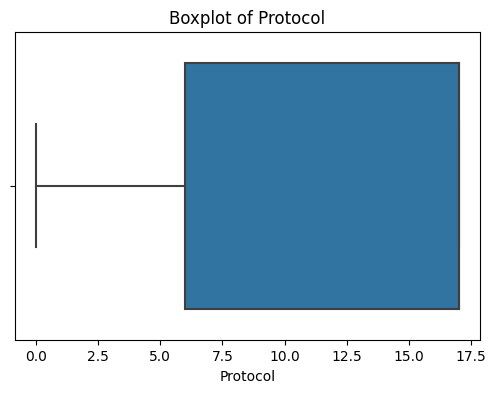


Outliers in Flow Duration:
3          37318940
8          12212269
45         36734149
50        117380210
62         60683512
            ...    
431346     53248629
431355     54907856
431356     45882535
431358     22938237
431367     55607701
Name: Flow Duration, Length: 64595, dtype: int64


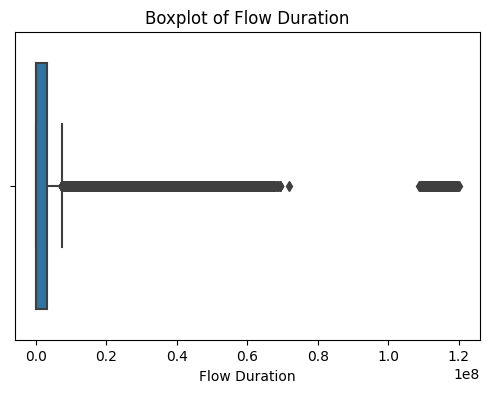


Outliers in Total Fwd Packets:
0         199
5          43
6         135
9         120
10        127
         ... 
431344     36
431349     39
431357    200
431361     39
431369     38
Name: Total Fwd Packets, Length: 87163, dtype: int64


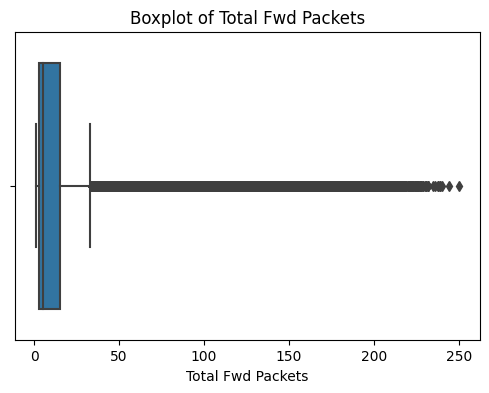


Outliers in Total Backward Packets:
3          6
13        24
45        32
50        35
71        29
          ..
431346     7
431355     7
431356     7
431361    32
431367     8
Name: Total Backward Packets, Length: 42632, dtype: int64


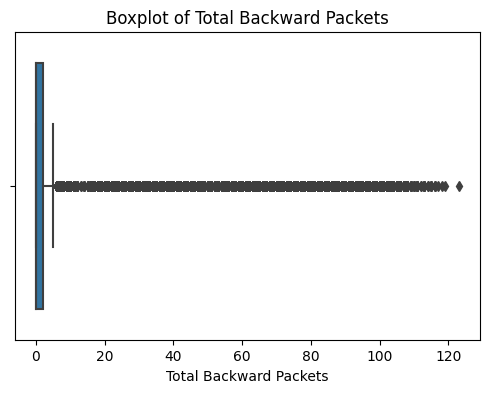


Outliers in Fwd Packets Length Total:
0         89381.0
5         26767.0
6         65973.0
9         20688.0
10        63170.0
           ...   
431344    24223.0
431349    23327.0
431361    17049.0
431369    27252.0
431370    82607.0
Name: Fwd Packets Length Total, Length: 79981, dtype: float64


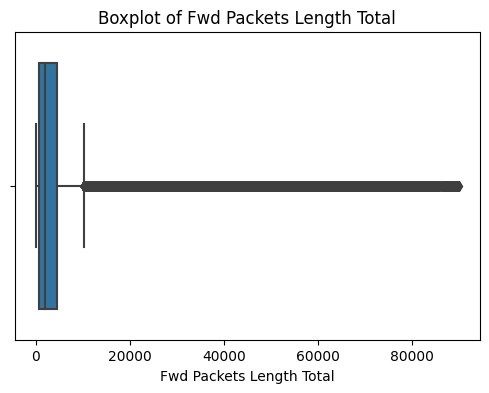


Outliers in Bwd Packets Length Total:
13        11562.0
17          200.0
50         7401.0
69          219.0
71        12147.0
           ...   
431350      203.0
431355      181.0
431361    12267.0
431362      212.0
431364      206.0
Name: Bwd Packets Length Total, Length: 42975, dtype: float64


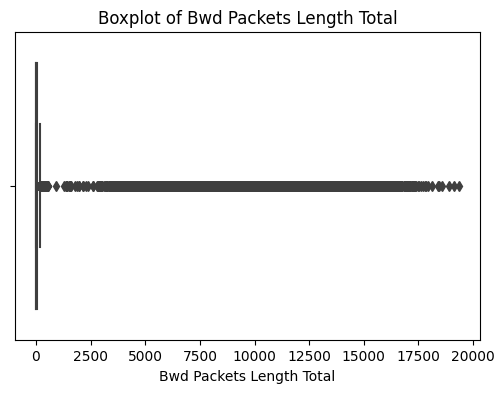


Outliers in Fwd Packet Length Max:
55        1458.0
94        1471.0
105       1464.0
122       1308.0
142       1470.0
           ...  
431211    1429.0
431309    1451.0
431342    1446.0
431359    1455.0
431361    1342.0
Name: Fwd Packet Length Max, Length: 11528, dtype: float64


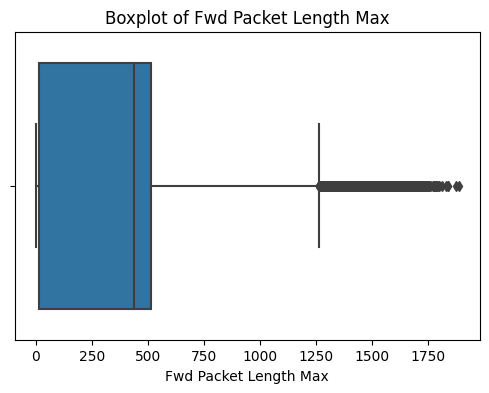


Outliers in Fwd Packet Length Min:
25        1431.0
55        1470.0
142       1415.0
163       1468.0
265       1437.0
           ...  
431126    1456.0
431248    1451.0
431261    1451.0
431285    1421.0
431309    1414.0
Name: Fwd Packet Length Min, Length: 10589, dtype: float64


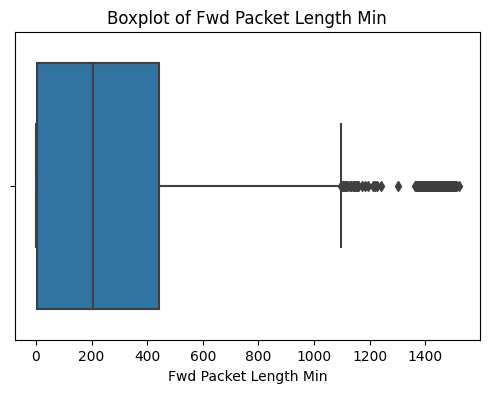


Outliers in Fwd Packet Length Mean:
25        1675.770321
55        1599.130419
94        1502.312162
116       1504.534144
142       1484.113559
             ...     
431250    1453.676060
431271    1291.221512
431285    1459.091221
431309    1468.858763
431359    1486.507099
Name: Fwd Packet Length Mean, Length: 14920, dtype: float64


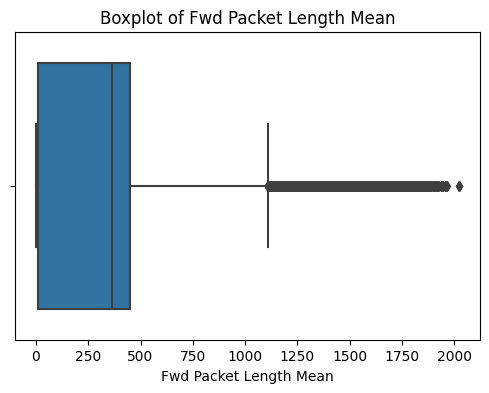


Outliers in Fwd Packet Length Std:
13        109.857245
18        235.123510
47        110.509307
48         37.725826
50        104.296635
             ...    
431343     91.747885
431344     40.341154
431361    222.260583
431366    102.345267
431369    146.123483
Name: Fwd Packet Length Std, Length: 39022, dtype: float64


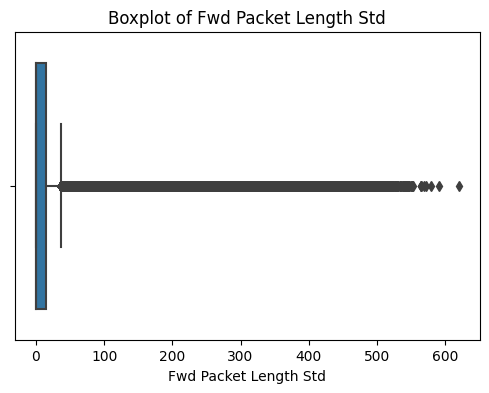


Outliers in Bwd Packet Length Max:
13        2708.0
17          79.0
34          59.0
35           9.0
38         157.0
           ...  
431360      49.0
431361    1042.0
431362      72.0
431364      68.0
431367       8.0
Name: Bwd Packet Length Max, Length: 68478, dtype: float64


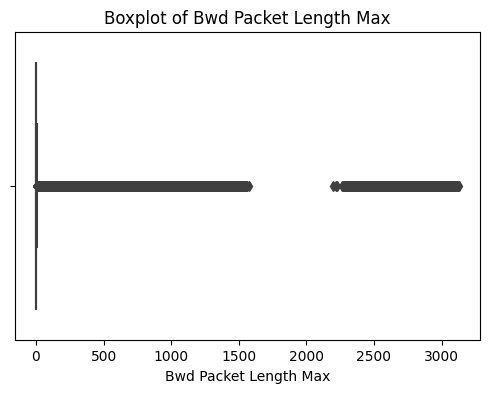


Outliers in Bwd Packet Length Min:
3          6.0
4          6.0
11         6.0
16         6.0
17        58.0
          ... 
431356     6.0
431360    53.0
431362    88.0
431364    91.0
431367     6.0
Name: Bwd Packet Length Min, Length: 93553, dtype: float64


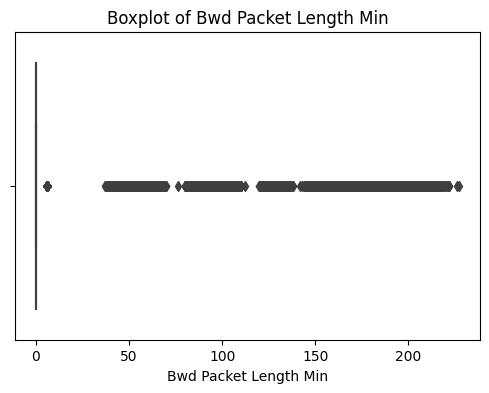


Outliers in Bwd Packet Length Mean:
13         999.016125
17          81.171670
34          51.727020
35           8.363867
38         244.088805
             ...     
431360      21.535396
431361    1065.275883
431362      72.387399
431364      51.135156
431367       7.715287
Name: Bwd Packet Length Mean, Length: 74970, dtype: float64


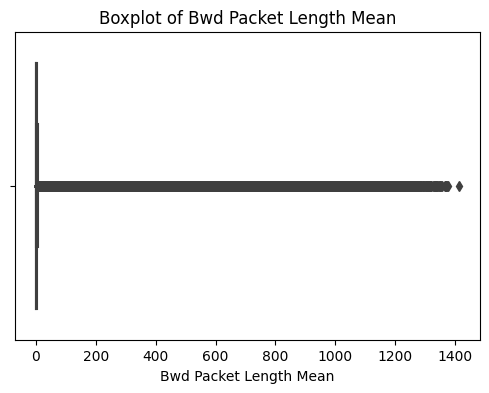


Outliers in Bwd Packet Length Std:
13        941.499993
50        589.369585
71        430.120865
82        287.306651
105       418.667751
             ...    
431315    253.888791
431336    178.406495
431351    200.618854
431360    158.865525
431361    959.081415
Name: Bwd Packet Length Std, Length: 24510, dtype: float64


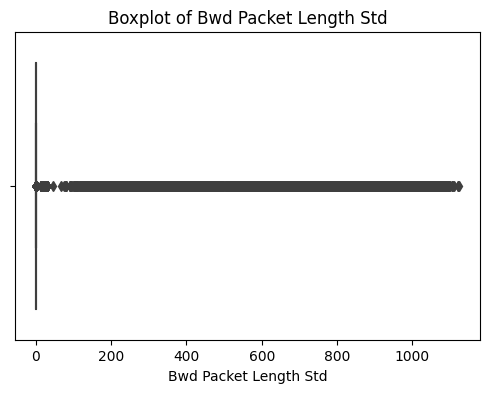


Outliers in Flow Bytes/s:
0         4.842838e+07
5         5.437760e+07
7         3.853933e+07
10        5.780187e+07
15        7.261799e+07
              ...     
431347    4.541509e+07
431353    7.613447e+08
431359    7.573936e+07
431363    1.034180e+09
431366    6.066008e+07
Name: Flow Bytes/s, Length: 73511, dtype: float64


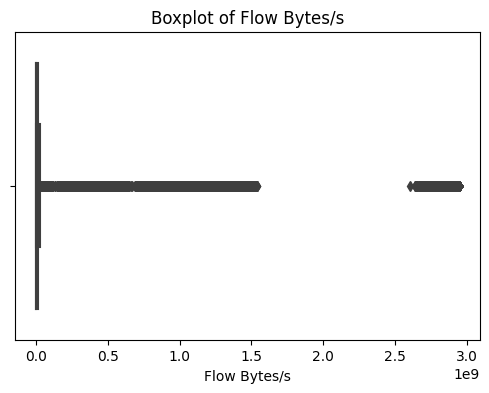


Outliers in Flow Packets/s:
0         1.166019e+05
7         2.311218e+05
13        8.884519e+04
14        6.649757e+05
15        2.428897e+05
              ...     
431349    1.707360e+05
431353    1.995650e+06
431359    1.144728e+05
431363    2.010693e+06
431366    2.459764e+05
Name: Flow Packets/s, Length: 83425, dtype: float64


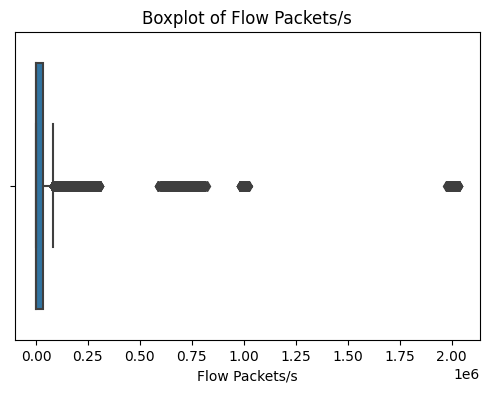


Outliers in Flow IAT Mean:
3         3.176691e+06
45        5.558722e+06
50        2.947178e+06
62        5.145266e+06
77        6.937883e+06
              ...     
431316    5.814612e+06
431317    4.125553e+06
431346    5.261110e+06
431355    3.913326e+06
431356    2.990777e+06
Name: Flow IAT Mean, Length: 48271, dtype: float64


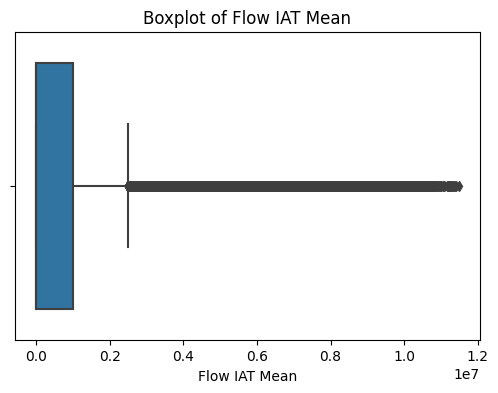


Outliers in Flow IAT Std:
3         6.535040e+06
45        6.921180e+06
62        6.183475e+06
67        5.739378e+06
77        8.017401e+06
              ...     
431346    5.981149e+06
431355    6.656391e+06
431356    5.955626e+06
431358    9.243983e+06
431367    6.117404e+06
Name: Flow IAT Std, Length: 57737, dtype: float64


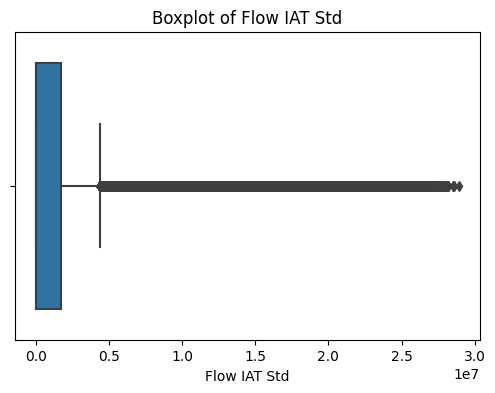


Outliers in Flow IAT Max:
3         15623380.0
19        25290049.0
45        15985631.0
50        58926103.0
62        46602347.0
             ...    
431351    10131484.0
431355    16535731.0
431356    17142037.0
431358    17293764.0
431367    16499287.0
Name: Flow IAT Max, Length: 64078, dtype: float64


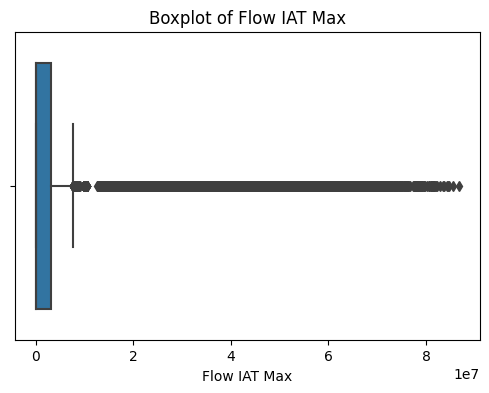


Outliers in Flow IAT Min:
16        34724.0
39            5.0
74        44385.0
93            9.0
99        41004.0
           ...   
431233    31541.0
431268        2.0
431283        8.0
431287    36444.0
431355      287.0
Name: Flow IAT Min, Length: 21036, dtype: float64


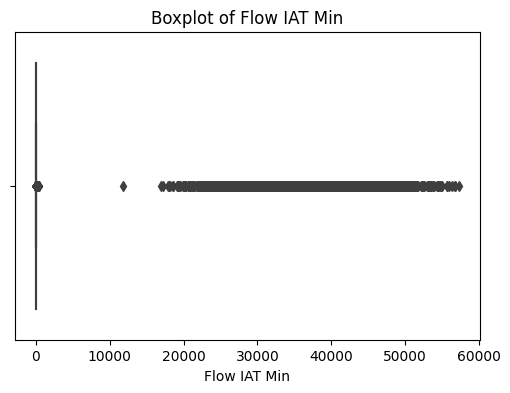


Outliers in Fwd IAT Total:
3          51617039.0
45         39611104.0
50        116783406.0
62         53551119.0
67          8281196.0
             ...     
431346     56889537.0
431351      9738894.0
431355     34504653.0
431356     27773412.0
431367     60902181.0
Name: Fwd IAT Total, Length: 63969, dtype: float64


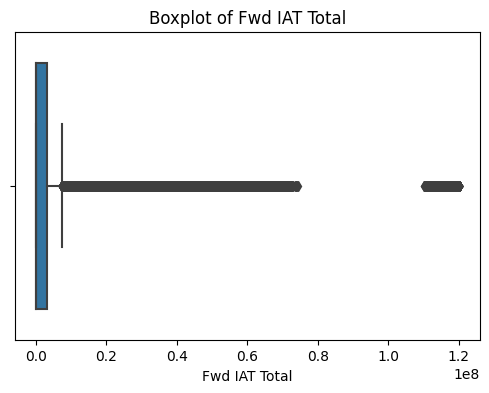


Outliers in Fwd IAT Mean:
3         4.290162e+06
45        5.409451e+06
50        3.611573e+06
54        6.813586e+06
62        4.772838e+06
              ...     
431317    4.797342e+06
431346    5.584448e+06
431355    6.496356e+06
431356    4.844970e+06
431367    6.298346e+06
Name: Fwd IAT Mean, Length: 56752, dtype: float64


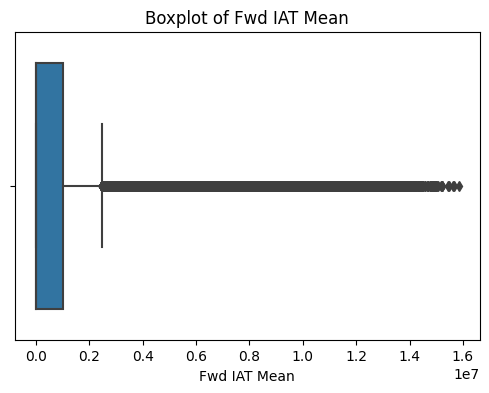


Outliers in Fwd IAT Std:
3         5.142574e+06
8         5.181390e+06
45        1.262257e+07
50        4.697625e+06
62        1.018330e+07
              ...     
431315    1.622887e+07
431316    6.115990e+06
431317    5.223640e+06
431351    1.457068e+07
431355    1.610569e+07
Name: Fwd IAT Std, Length: 54421, dtype: float64


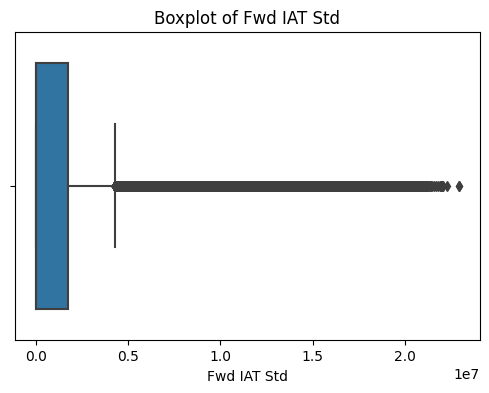


Outliers in Fwd IAT Max:
3         17114616.0
8         12105228.0
19        12619747.0
45        14943331.0
50        15282921.0
             ...    
431351    13590719.0
431355    17999973.0
431356    16317790.0
431358    17541773.0
431367    12001273.0
Name: Fwd IAT Max, Length: 67138, dtype: float64


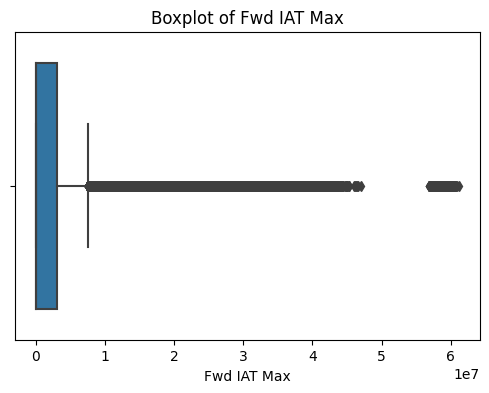


Outliers in Fwd IAT Min:
37        324.0
100       385.0
123       318.0
188       552.0
199       388.0
          ...  
431180    360.0
431213    325.0
431264    361.0
431346    371.0
431367    355.0
Name: Fwd IAT Min, Length: 12061, dtype: float64


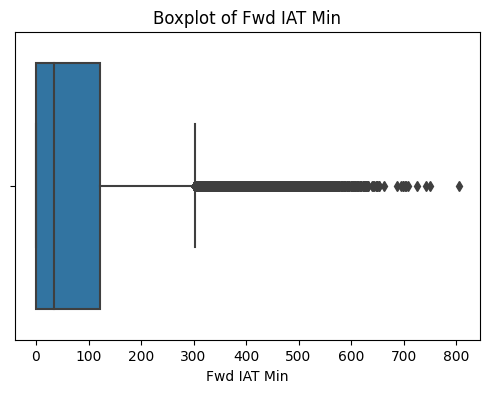


Outliers in Bwd IAT Total:
3          25385573.0
50        111751147.0
62         27089410.0
77        113408196.0
81         39548859.0
             ...     
431337      4071781.0
431346     22803991.0
431355     54949254.0
431356     20154248.0
431367     22923156.0
Name: Bwd IAT Total, Length: 40982, dtype: float64


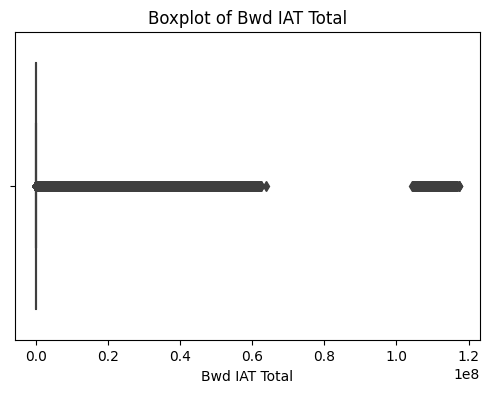


Outliers in Bwd IAT Mean:
18        2.169622e+03
31        2.029222e+03
42        1.706430e+03
45        6.232620e+06
46        1.448940e+03
              ...     
431339    1.308837e+03
431346    5.351519e+06
431355    5.391595e+06
431356    4.969344e+06
431367    5.772565e+06
Name: Bwd IAT Mean, Length: 69210, dtype: float64


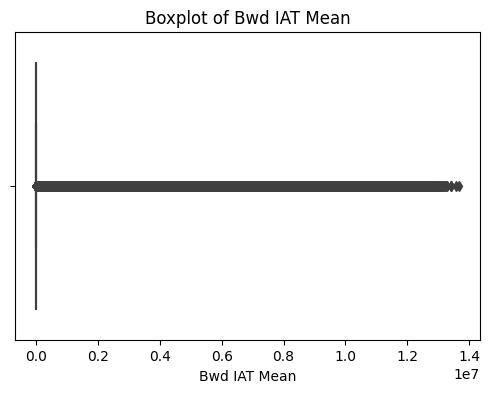


Outliers in Bwd IAT Std:
45        1.195653e+07
50        5.499355e+06
62        1.857096e+07
77        1.657068e+07
81        1.355398e+07
              ...     
431337    4.268745e+06
431346    5.335022e+06
431350    1.530185e+06
431356    5.999009e+06
431367    5.304254e+06
Name: Bwd IAT Std, Length: 43354, dtype: float64


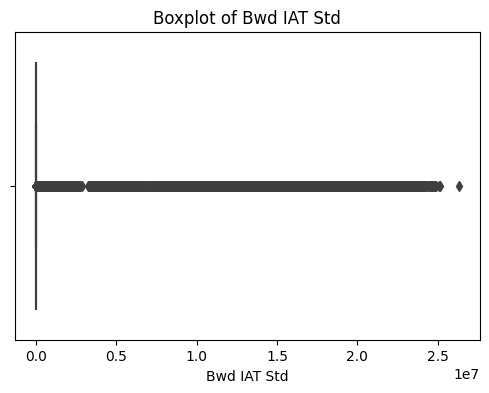


Outliers in Bwd IAT Max:
4             9823.0
10            5763.0
15            4424.0
33            2870.0
40            1422.0
             ...    
431354        2232.0
431356    16852074.0
431361      117802.0
431366        1957.0
431367    38908639.0
Name: Bwd IAT Max, Length: 76039, dtype: float64


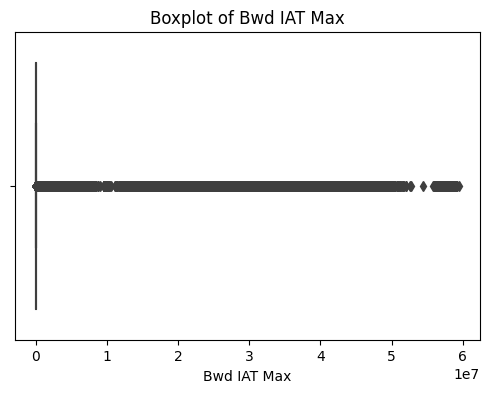


Outliers in Bwd IAT Min:
4          3.0
17         3.0
35        50.0
69         3.0
86         3.0
          ... 
431305     3.0
431308     3.0
431317    48.0
431323     3.0
431354     3.0
Name: Bwd IAT Min, Length: 23037, dtype: float64


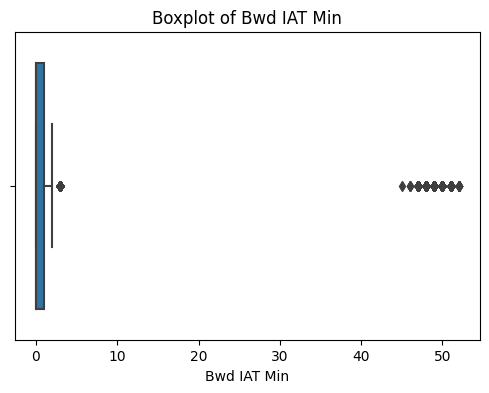


Outliers in Fwd PSH Flags:
2         1
7         1
18        1
29        1
34        1
         ..
431253    1
431257    1
431289    1
431308    1
431333    1
Name: Fwd PSH Flags, Length: 28486, dtype: int64


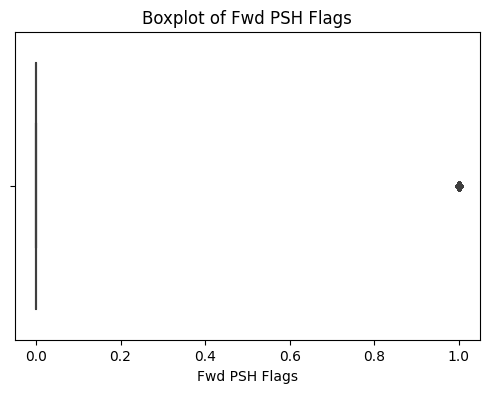


Outliers in Fwd Header Length:
51       -2121769438
63       -2114398108
81           -493809
102          -480486
164      -2122515698
             ...    
431265   -2122305012
431267   -2106120161
431292   -2122965092
431298   -2119013551
431321   -2110691075
Name: Fwd Header Length, Length: 16567, dtype: int64


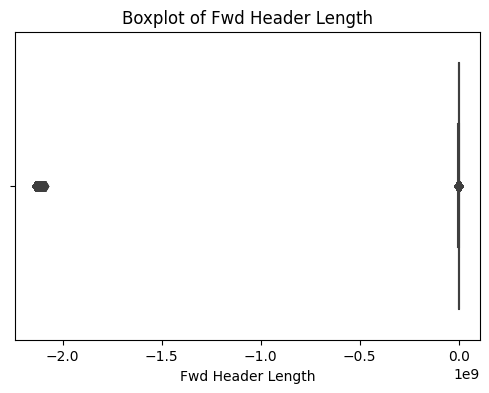


Outliers in Bwd Header Length:
165      -62509
282       78465
320       84426
453      -83873
645      -61303
          ...  
430595   -70433
430638    57057
431045   -65833
431223    57818
431317   -74430
Name: Bwd Header Length, Length: 3580, dtype: int64


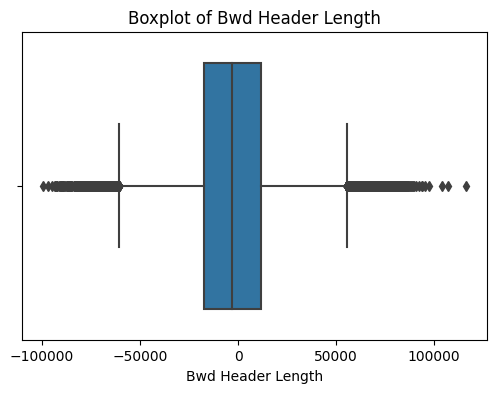


Outliers in Fwd Packets/s:
0         1.032152e+05
7         1.386709e+05
15        1.454283e+05
22        1.982695e+06
25        1.976816e+06
              ...     
431352    9.946294e+05
431353    1.991772e+06
431359    1.993440e+06
431363    1.971773e+06
431366    1.676751e+05
Name: Fwd Packets/s, Length: 77849, dtype: float64


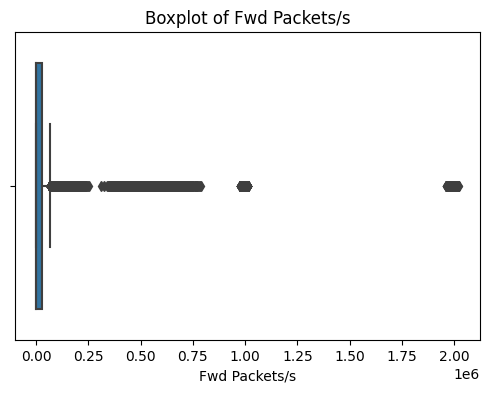


Outliers in Bwd Packets/s:
4         18827.520269
11        18127.000911
13        18688.485004
16          123.132451
35        18176.386739
              ...     
431319    14416.660966
431323    22869.980814
431357    15858.948275
431360      123.475841
431361    16655.646892
Name: Bwd Packets/s, Length: 37844, dtype: float64


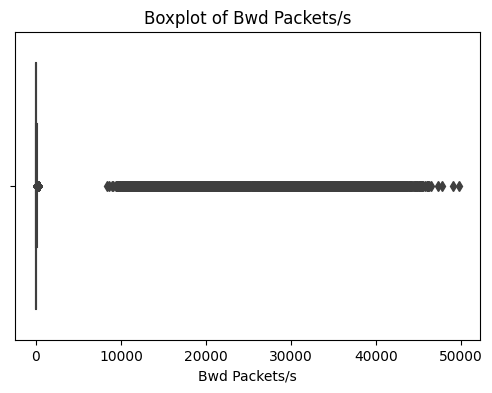


Outliers in Packet Length Min:
55        1472.0
101       1238.0
116       1258.0
142       1463.0
163       1471.0
           ...  
431248    1232.0
431271    1314.0
431292    1273.0
431309    1456.0
431359    1465.0
Name: Packet Length Min, Length: 11180, dtype: float64


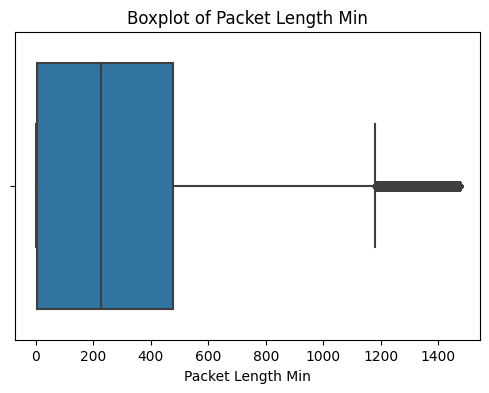


Outliers in Packet Length Max:
13        1953.0
25        1327.0
55        1411.0
101       1474.0
118       2851.0
           ...  
431309    1424.0
431324    1411.0
431342    1428.0
431359    1439.0
431361    2954.0
Name: Packet Length Max, Length: 23532, dtype: float64


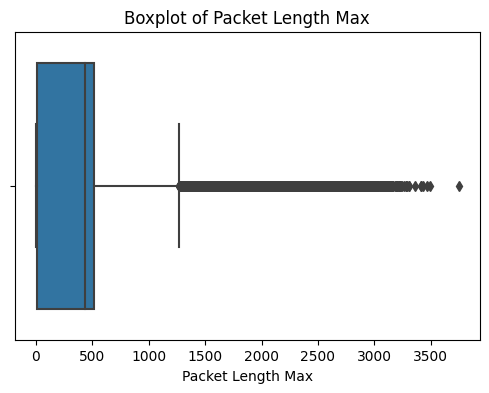


Outliers in Packet Length Mean:
25        1485.334824
55        1496.605149
94        1481.301113
95        1341.299526
142       1473.223162
             ...     
431248    1449.867911
431250    1481.148828
431285    1402.007809
431309    1486.253630
431359    1482.540168
Name: Packet Length Mean, Length: 11826, dtype: float64


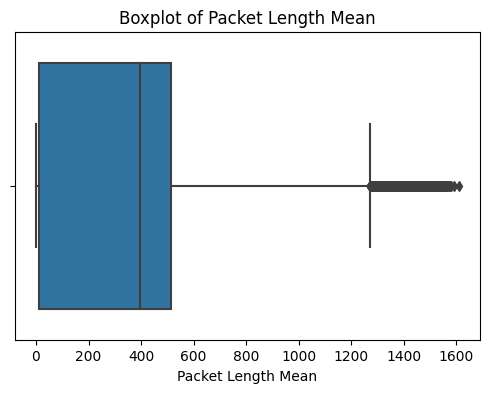


Outliers in Packet Length Std:
12          54.055588
13         966.788004
47         167.006790
50         126.728251
65          76.870169
             ...     
431344      71.878373
431351     141.534542
431361    1050.136092
431366      60.444547
431369      58.832511
Name: Packet Length Std, Length: 52230, dtype: float64


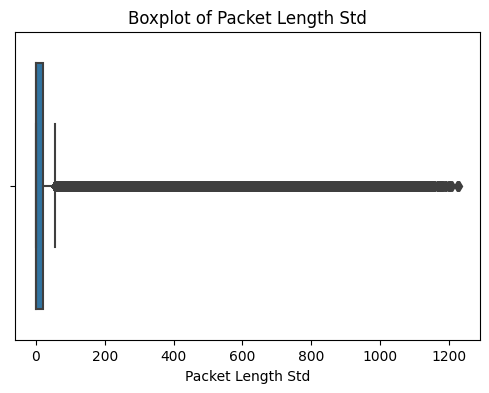


Outliers in Packet Length Variance:
12        3.459934e+03
13        5.584551e+05
38        6.804211e+03
47        2.285343e+04
50        2.017806e+04
              ...     
431351    2.782929e+04
431361    1.151230e+06
431363    1.563079e+03
431366    3.705624e+03
431369    4.760106e+03
Name: Packet Length Variance, Length: 59518, dtype: float64


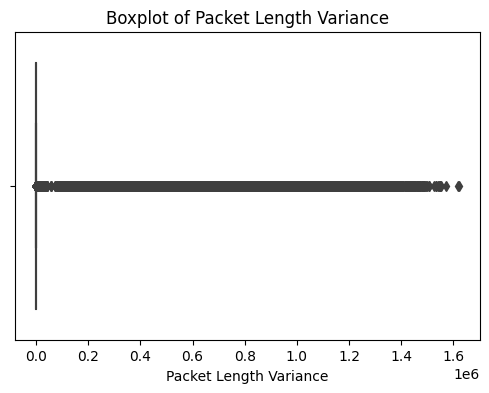


Outliers in SYN Flag Count:
193       1
196       1
240       1
274       1
387       1
         ..
431045    1
431088    1
431102    1
431120    1
431307    1
Name: SYN Flag Count, Length: 6752, dtype: int64


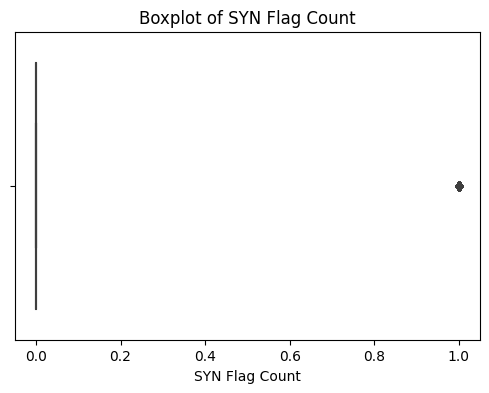


Outliers in RST Flag Count:
2         1
4         1
7         1
13        1
29        1
         ..
431257    1
431289    1
431302    1
431306    1
431308    1
Name: RST Flag Count, Length: 29376, dtype: int64


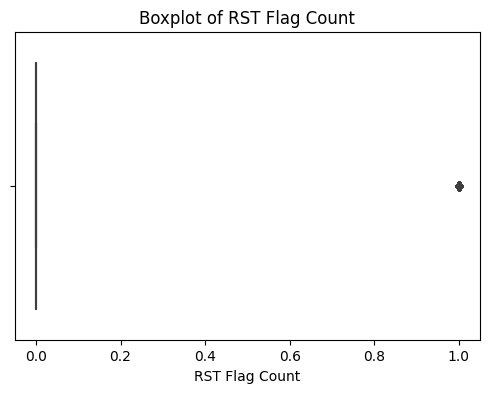


Outliers in ACK Flag Count:
3         1
13        1
19        1
35        1
45        1
         ..
431350    1
431356    1
431357    1
431361    1
431367    1
Name: ACK Flag Count, Length: 77484, dtype: int64


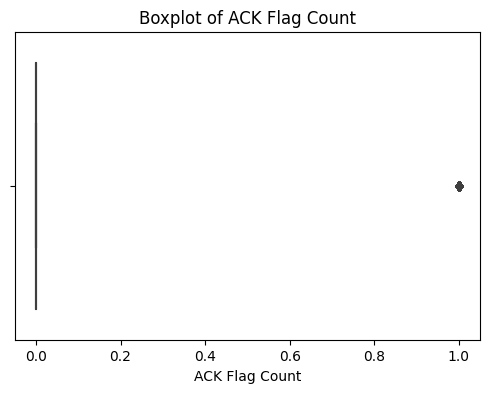


Outliers in URG Flag Count:
2         1
4         1
7         1
11        1
13        1
         ..
431323    1
431325    1
431331    1
431333    1
431355    1
Name: URG Flag Count, Length: 76679, dtype: int64


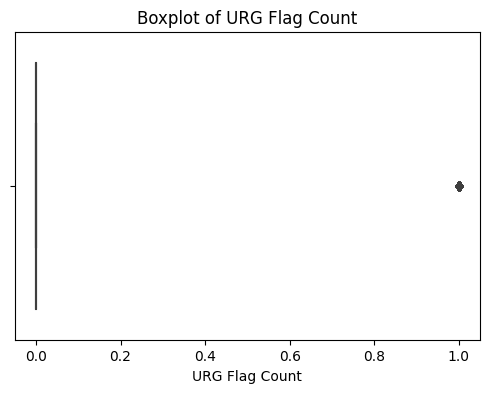


Outliers in CWE Flag Count:
4         1
11        1
16        1
26        1
63        1
         ..
431287    1
431306    1
431318    1
431319    1
431323    1
Name: CWE Flag Count, Length: 28538, dtype: int64


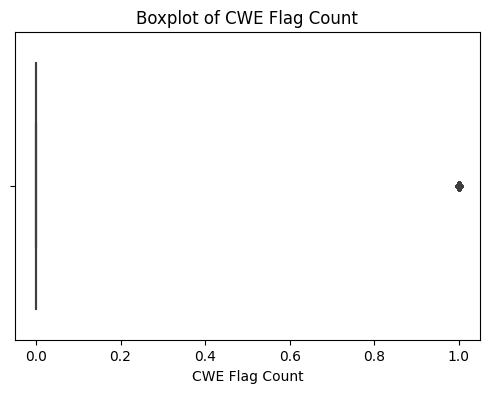


Outliers in Down/Up Ratio:
4         2.0
11        2.0
13        1.0
16        2.0
17        1.0
         ... 
431354    1.0
431360    1.0
431361    1.0
431362    1.0
431364    1.0
Name: Down/Up Ratio, Length: 86630, dtype: float64


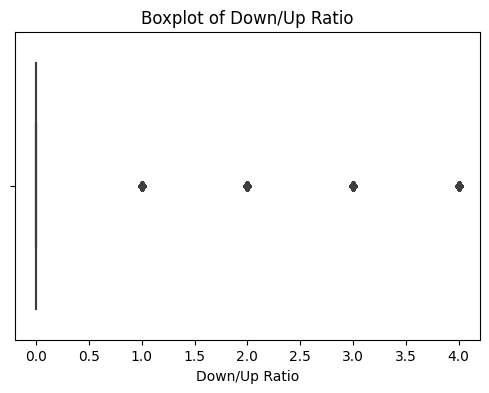


Outliers in Avg Packet Size:
25        2139.804908
55        2172.898447
94        2218.950022
116       1957.555344
134       1942.378728
             ...     
431057    1805.373522
431285    2000.842437
431309    2186.646942
431342    1935.520068
431359    2202.429730
Name: Avg Packet Size, Length: 11894, dtype: float64


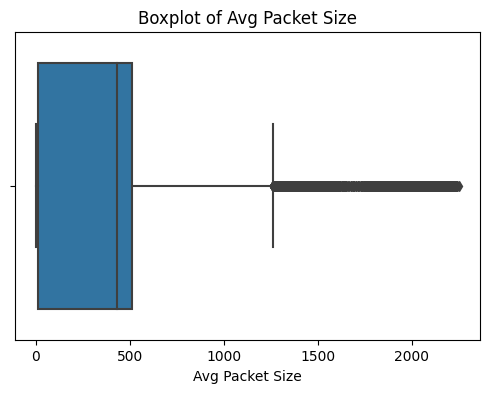


Outliers in Avg Fwd Segment Size:
0         1446.130632
25        1237.344086
55        1449.368969
142       1437.345166
163       1464.658434
             ...     
431211    1400.467204
431309    1420.716320
431320    1101.195110
431324    1459.323056
431359    1450.274875
Name: Avg Fwd Segment Size, Length: 11003, dtype: float64


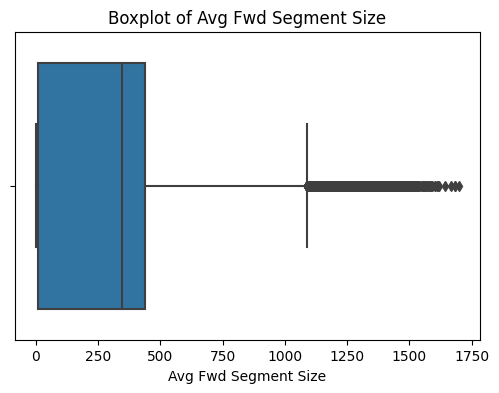


Outliers in Avg Bwd Segment Size:
13         980.205625
17          81.422285
38         122.320730
44         109.192088
50         349.173507
             ...     
431351      67.942966
431360      62.508893
431361    1129.744873
431362      77.367230
431364      76.678816
Name: Avg Bwd Segment Size, Length: 62207, dtype: float64


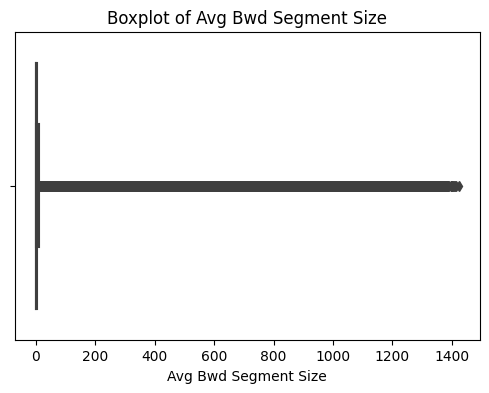


Outliers in Subflow Fwd Packets:
6         101
9         199
10         96
12         29
14        196
         ... 
431335     85
431341     32
431349     33
431361     91
431366     28
Name: Subflow Fwd Packets, Length: 75569, dtype: int64


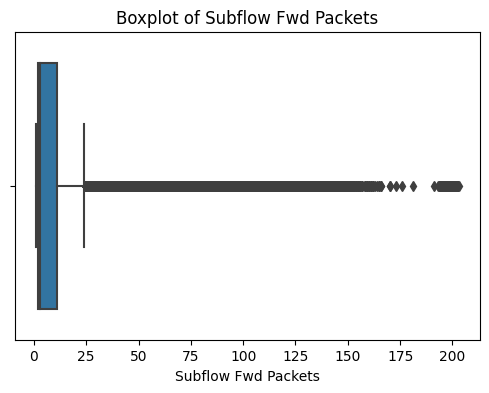


Outliers in Subflow Fwd Bytes:
0         89054
5         26635
6         81679
9         22343
10        53335
          ...  
431344    22728
431348    15659
431349    13614
431361    13446
431370    82536
Name: Subflow Fwd Bytes, Length: 76318, dtype: int64


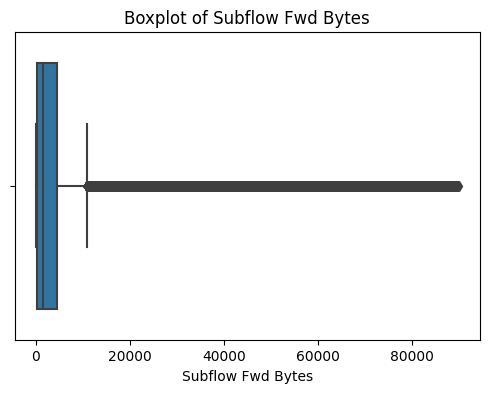


Outliers in Subflow Bwd Packets:
13        14
50        28
71        17
77        25
82        15
          ..
431306    18
431315    26
431337    52
431351    20
431361    46
Name: Subflow Bwd Packets, Length: 23495, dtype: int64


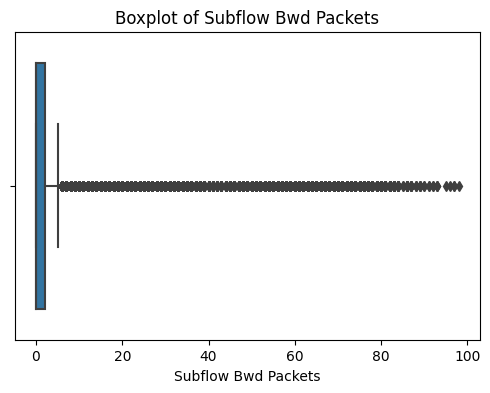


Outliers in Subflow Bwd Bytes:
13        11458
50         8234
71        10440
82        11275
105        9825
          ...  
431303    10032
431315     9328
431332      381
431337    10153
431361    12610
Name: Subflow Bwd Bytes, Length: 25950, dtype: int64


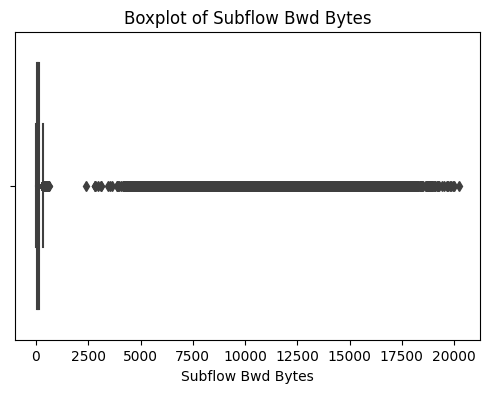


Outliers in Init Fwd Win Bytes:
3          5840
7         16422
8         63912
11          722
13        29301
          ...  
431350     8154
431356     5833
431358     5851
431361    29277
431367     5830
Name: Init Fwd Win Bytes, Length: 97023, dtype: int64


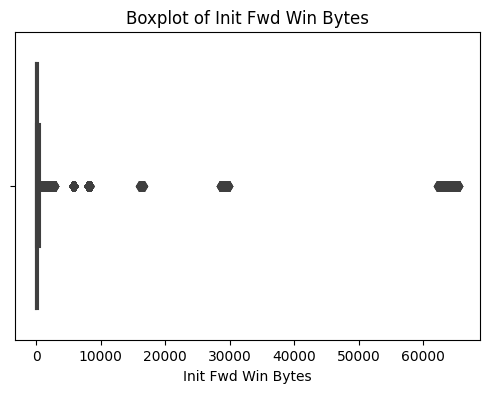


Outliers in Init Bwd Win Bytes:
4          211
11         145
13        1574
16         199
26         233
          ... 
431338       5
431350     235
431351     263
431355     225
431361    1865
Name: Init Bwd Win Bytes, Length: 69574, dtype: int64


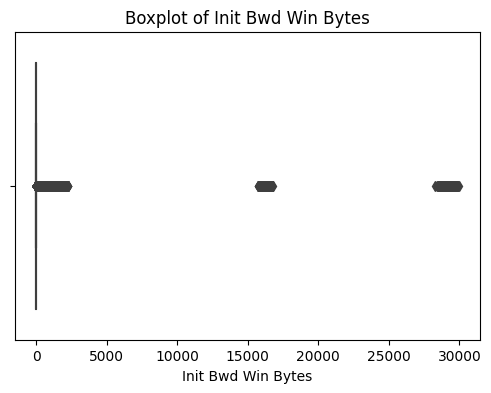


Outliers in Fwd Act Data Packets:
5          40
6         142
9          38
10        187
14        199
         ... 
431344     98
431349     38
431361     32
431366     35
431370     97
Name: Fwd Act Data Packets, Length: 85129, dtype: int64


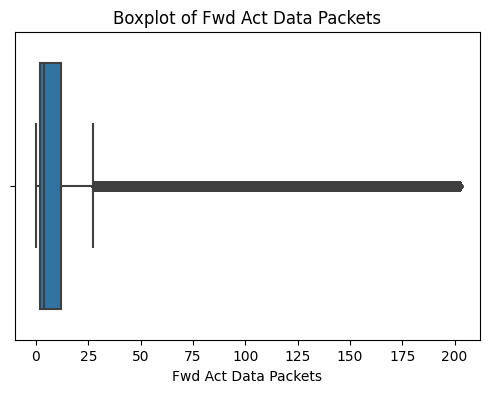


Outliers in Fwd Seg Size Min:
18       -1058444015
23       -1067359776
25       -1063775692
36       -1069514005
47            233118
             ...    
431177   -1065968699
431184        224398
431254   -1065147919
431342   -1062624083
431368   -1064477670
Name: Fwd Seg Size Min, Length: 14411, dtype: int64


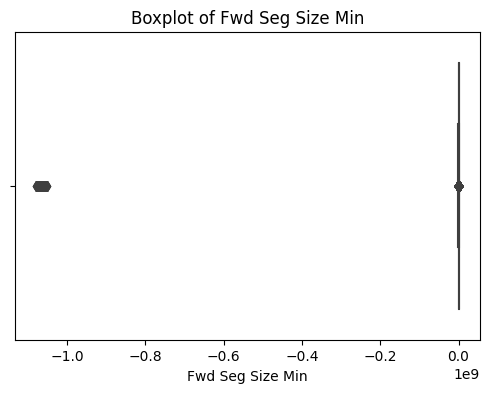


Outliers in Active Mean:
16        1.138082e+03
45        4.307327e+05
50        1.080023e+05
82        1.780949e+05
84        5.300709e+05
              ...     
431315    1.674283e+05
431316    4.376532e+05
431337    3.744444e+05
431351    1.029461e+05
431355    1.263938e+06
Name: Active Mean, Length: 25348, dtype: float64


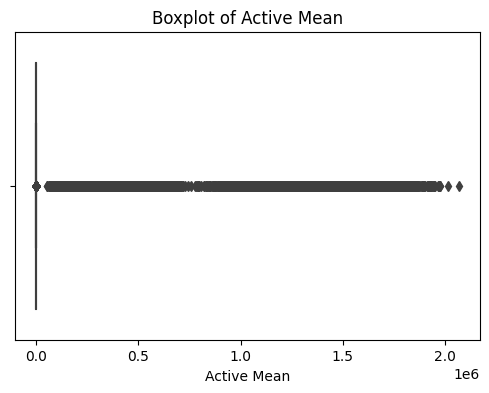


Outliers in Active Std:
50         94315.552459
62        788174.335171
84        780877.366953
105        70975.660708
175       511759.622237
              ...      
431293    744836.127601
431315     57216.472383
431316       743.312379
431346    897562.378034
431356       652.584749
Name: Active Std, Length: 19901, dtype: float64


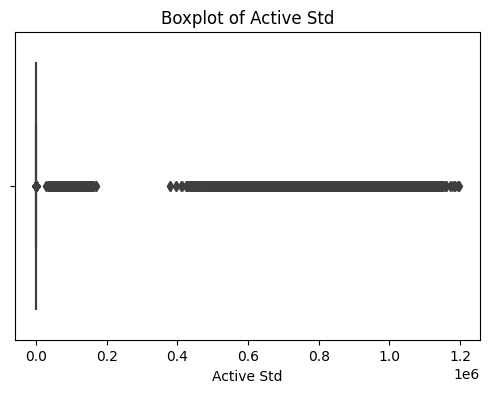


Outliers in Active Max:
14            355.0
26            463.0
27            356.0
33            456.0
43            431.0
            ...    
431309        409.0
431315     234357.0
431316    2080873.0
431336     196243.0
431361        364.0
Name: Active Max, Length: 46834, dtype: float64


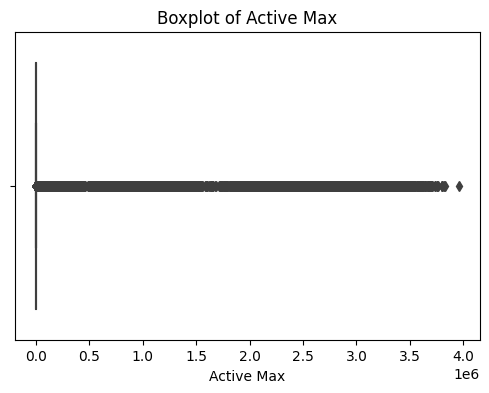


Outliers in Active Min:
16           274.0
29           159.0
39           272.0
50        268986.0
51           157.0
            ...   
431323       135.0
431335       124.0
431337     58210.0
431363       153.0
431367       223.0
Name: Active Min, Length: 64500, dtype: float64


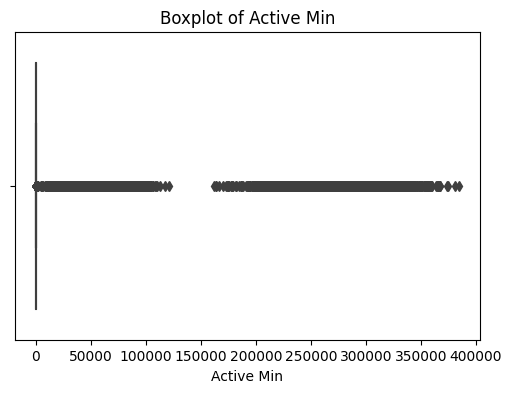


Outliers in Idle Mean:
3         1.015952e+07
8         1.005780e+07
18        2.908234e+02
19        1.104628e+07
28        8.515286e+03
              ...     
431346    7.831649e+06
431355    1.550634e+07
431356    8.419972e+06
431358    9.908488e+06
431367    9.688059e+06
Name: Idle Mean, Length: 75618, dtype: float64


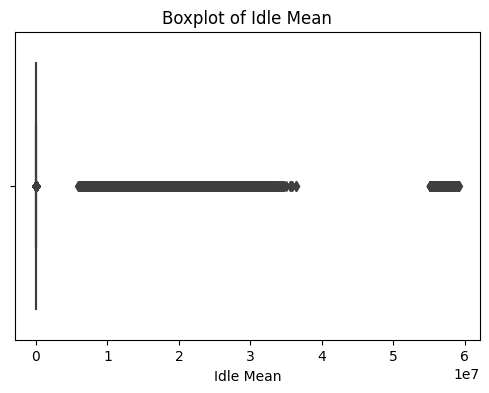


Outliers in Idle Std:
3         4.550064e+06
33        6.130756e+02
45        2.294063e+06
50        1.326440e+05
62        4.453779e+06
              ...     
431317    8.303239e+05
431346    1.103616e+06
431355    6.869251e+06
431356    3.217266e+06
431367    1.227176e+06
Name: Idle Std, Length: 63035, dtype: float64


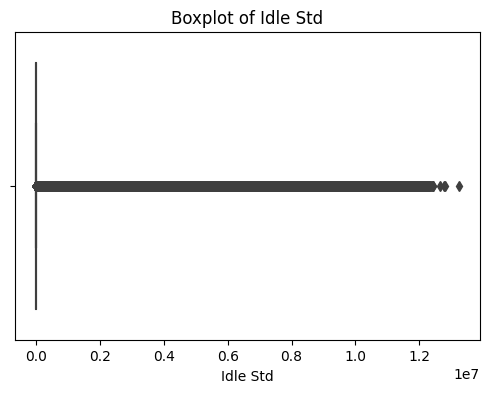


Outliers in Idle Max:
3         13765031.0
8         14918588.0
45        21744526.0
50        58409782.0
62        18603955.0
             ...    
431346    12794482.0
431355    32180030.0
431356    14336713.0
431358    13276474.0
431367    13640898.0
Name: Idle Max, Length: 66623, dtype: float64


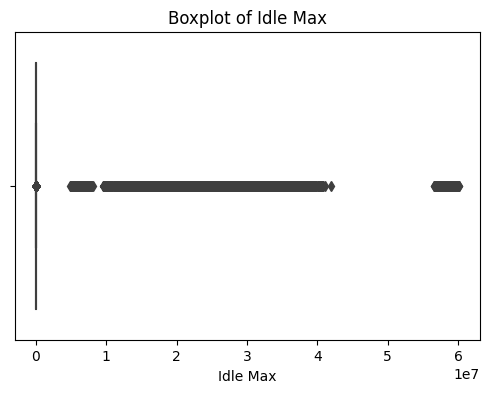


Outliers in Idle Min:
3          6928193.0
45        12431681.0
50         9403037.0
62         9998997.0
67        11205687.0
             ...    
431346     9405126.0
431355    10062701.0
431356     7108828.0
431358    16193063.0
431367     7246217.0
Name: Idle Min, Length: 64789, dtype: float64


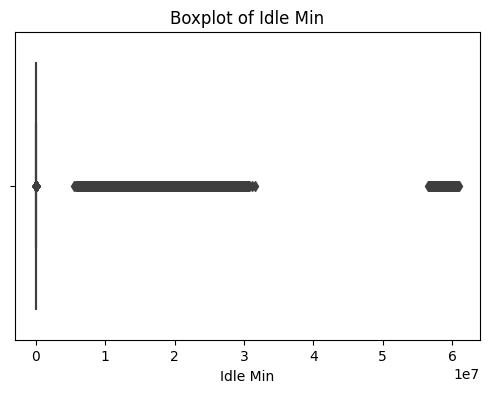


Features with Outliers: ['Flow Duration', 'Total Fwd Packets', 'Total Backward Packets', 'Fwd Packets Length Total', 'Bwd Packets Length Total', 'Fwd Packet Length Max', 'Fwd Packet Length Min', 'Fwd Packet Length Mean', 'Fwd Packet Length Std', 'Bwd Packet Length Max', 'Bwd Packet Length Min', 'Bwd Packet Length Mean', 'Bwd Packet Length Std', 'Flow Bytes/s', 'Flow Packets/s', 'Flow IAT Mean', 'Flow IAT Std', 'Flow IAT Max', 'Flow IAT Min', 'Fwd IAT Total', 'Fwd IAT Mean', 'Fwd IAT Std', 'Fwd IAT Max', 'Fwd IAT Min', 'Bwd IAT Total', 'Bwd IAT Mean', 'Bwd IAT Std', 'Bwd IAT Max', 'Bwd IAT Min', 'Fwd PSH Flags', 'Fwd Header Length', 'Bwd Header Length', 'Fwd Packets/s', 'Bwd Packets/s', 'Packet Length Min', 'Packet Length Max', 'Packet Length Mean', 'Packet Length Std', 'Packet Length Variance', 'SYN Flag Count', 'RST Flag Count', 'ACK Flag Count', 'URG Flag Count', 'CWE Flag Count', 'Down/Up Ratio', 'Avg Packet Size', 'Avg Fwd Segment Size', 'Avg Bwd Segment Size', 'Subflow Fwd Packet

In [18]:
# Outlier Identification
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Function to calculate whiskers
def whisker(column_values):
    q1, q3 = np.percentile(column_values, [25, 75])
    iqr = q3 - q1
    return q1 - 1.5 * iqr, q3 + 1.5 * iqr

# Find numerical columns
numerical_columns = df.select_dtypes(include='number').columns.tolist()

# Identify outliers in each column
outlier_columns = []
for col in numerical_columns:
    lw, uw = whisker(df[col])  # Get whisker limits
    outliers = df[(df[col] < lw) | (df[col] > uw)][col]  # Filter outliers
    
    if not outliers.empty:
        outlier_columns.append(col)
        print(f"\nOutliers in {col}:")
        print(outliers)
        
    # Boxplot to visualize outliers
    plt.figure(figsize=(6, 4))
    sns.boxplot(x=df[col])
    plt.title(f"Boxplot of {col}")
    plt.show()

print("\nFeatures with Outliers:", outlier_columns)

Boxplots BEFORE Outlier Treatment:


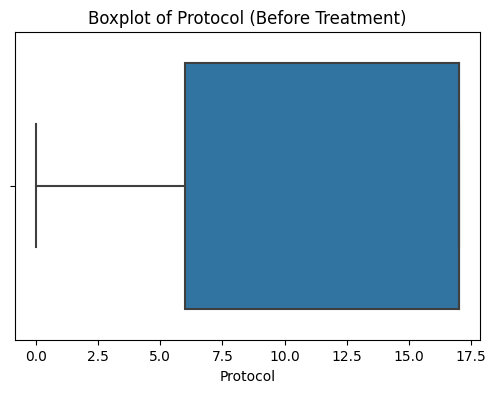

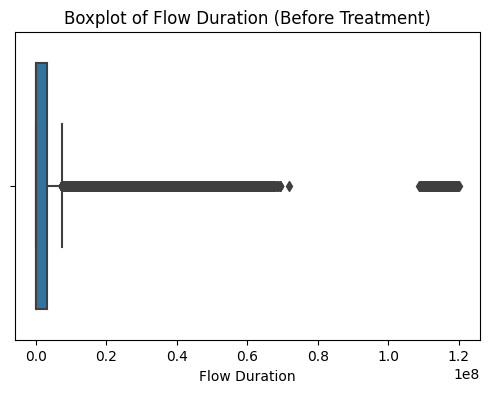

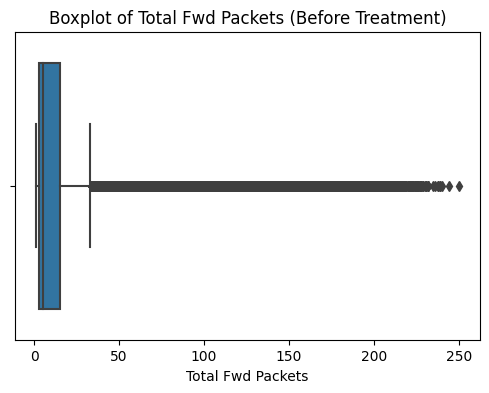

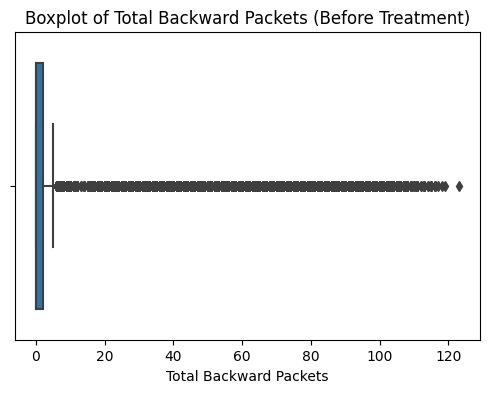

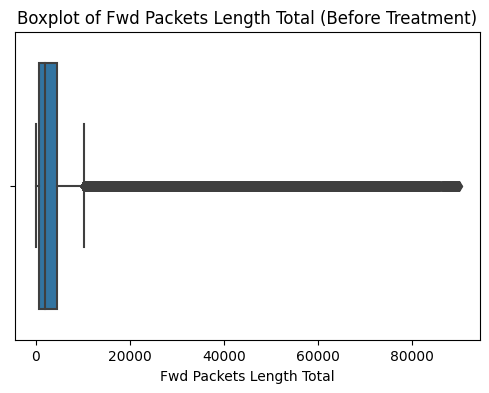

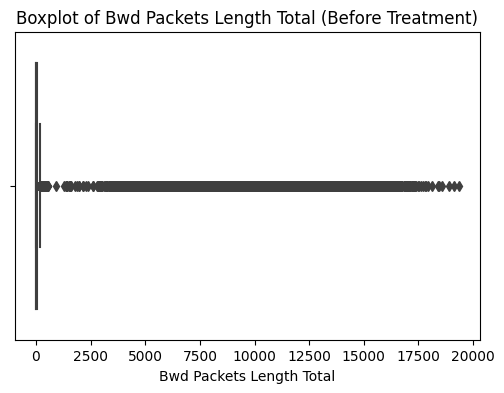

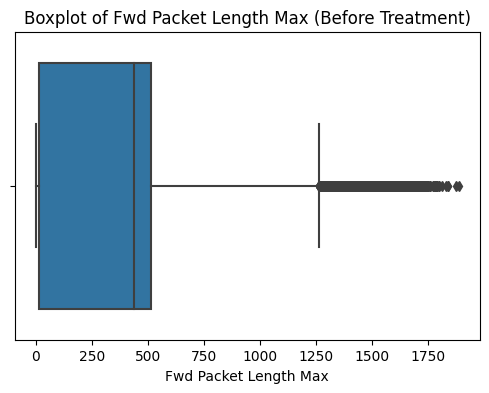

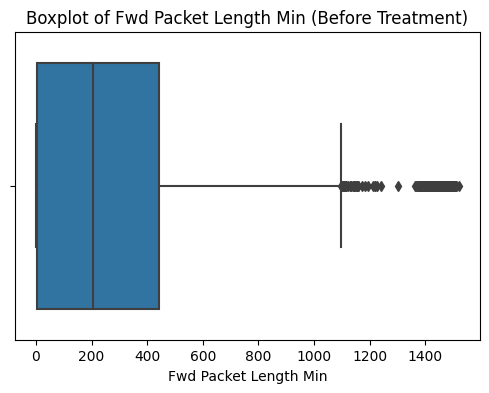

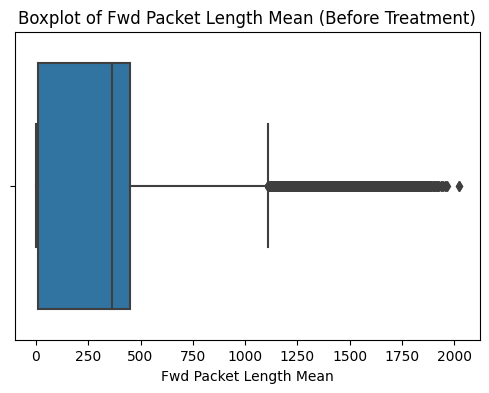

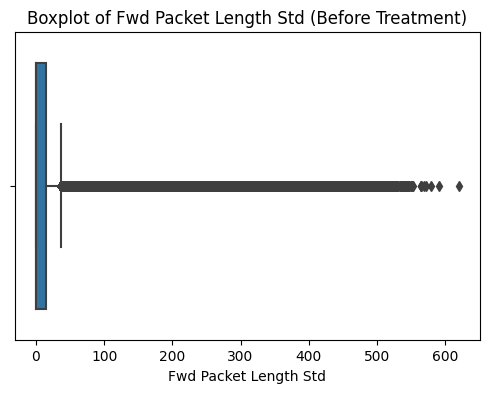

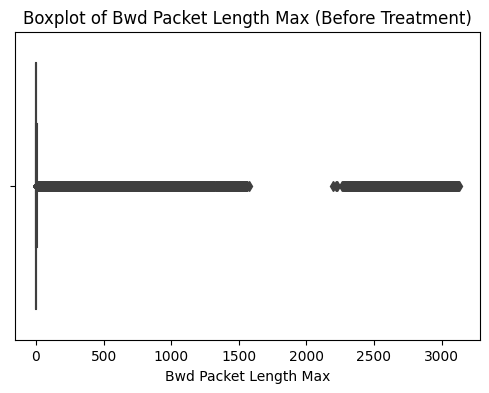

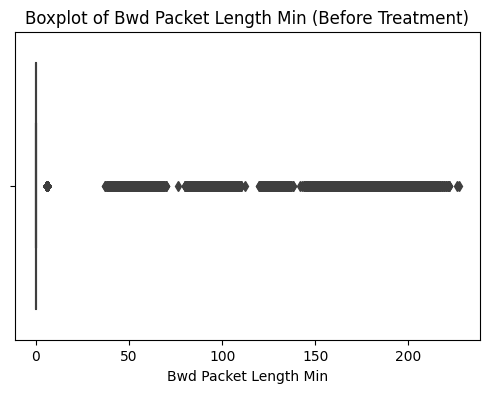

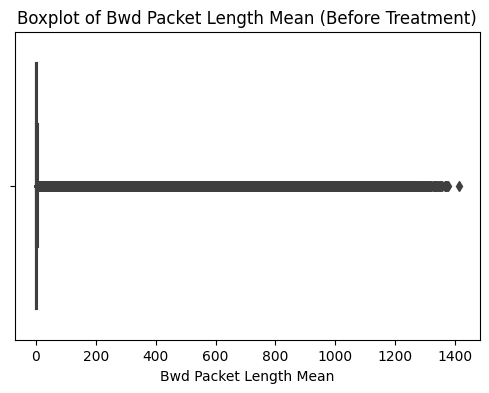

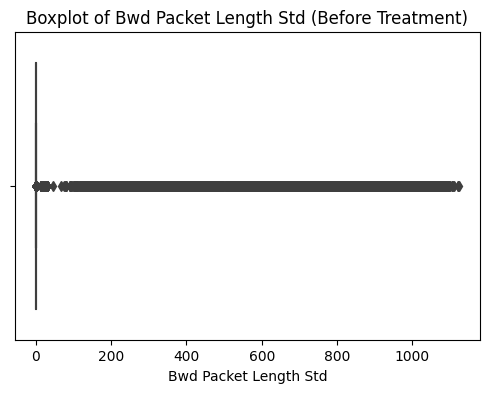

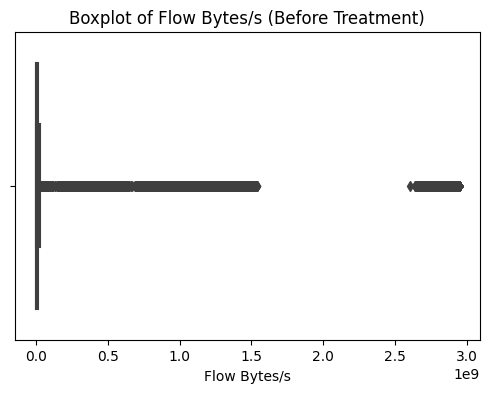

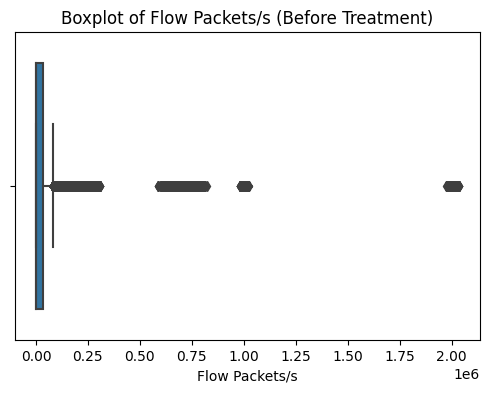

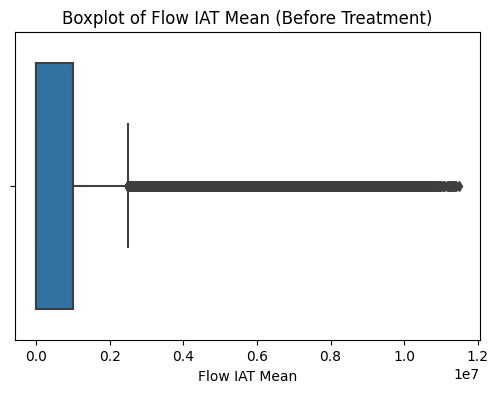

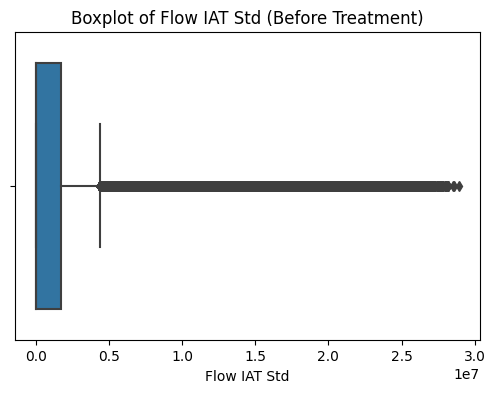

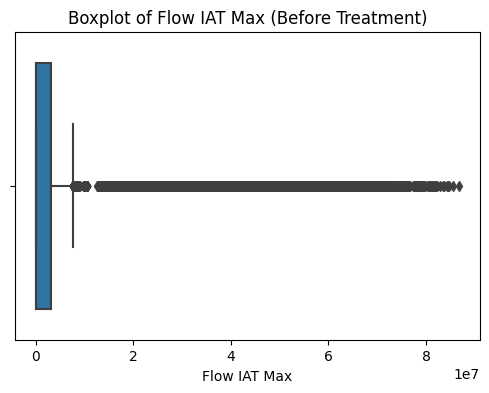

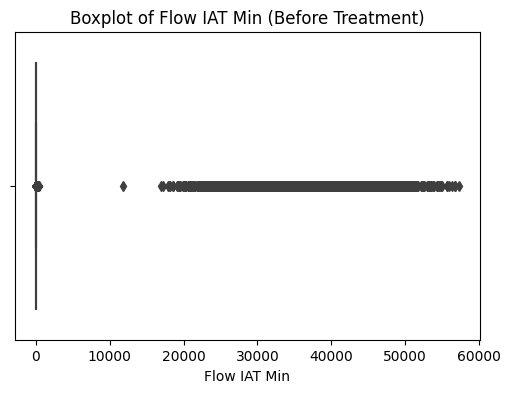

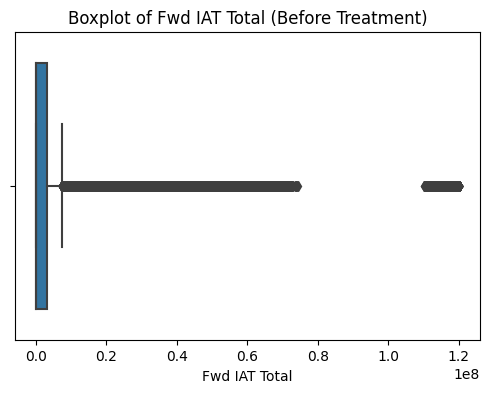

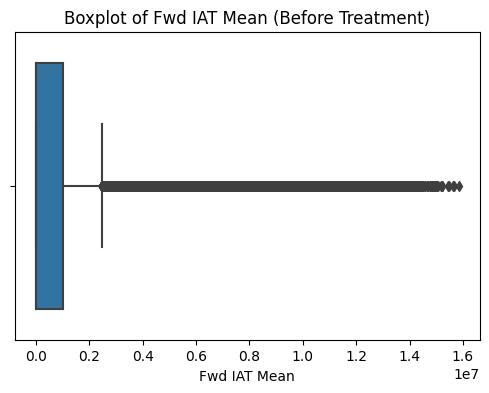

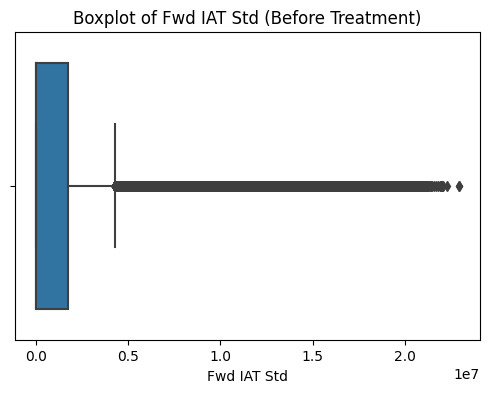

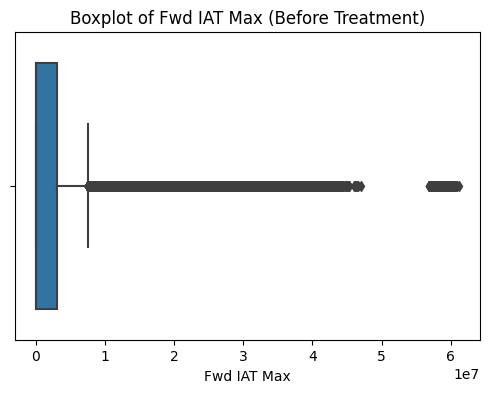

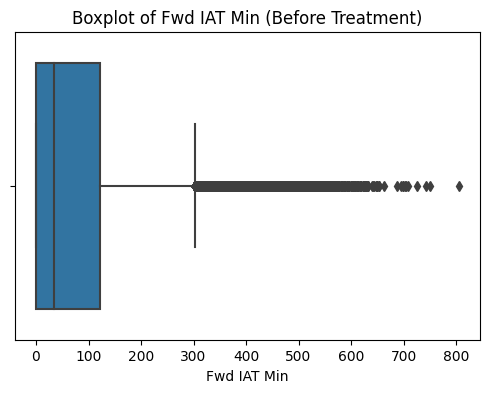

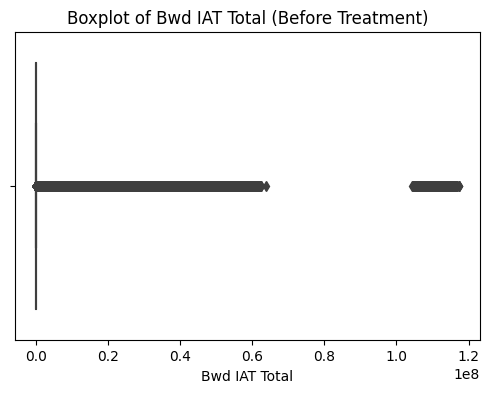

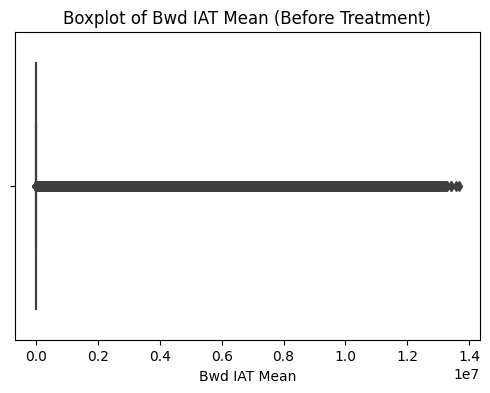

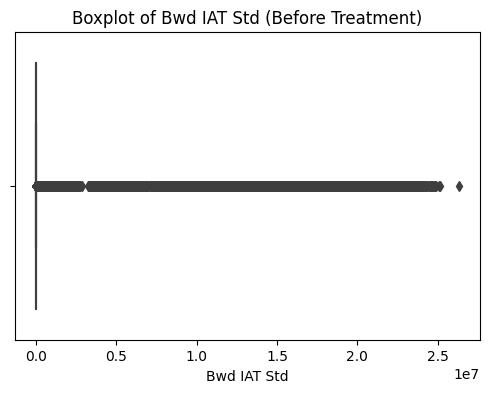

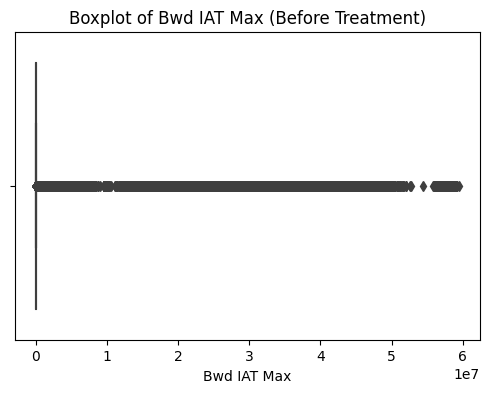

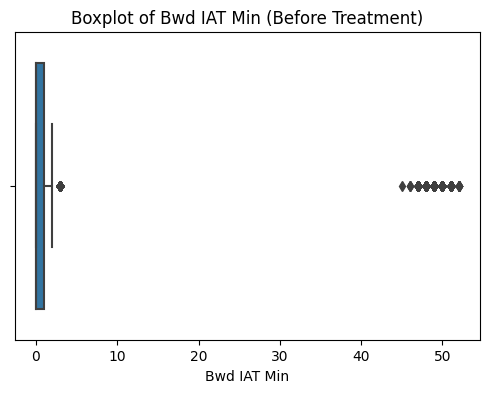

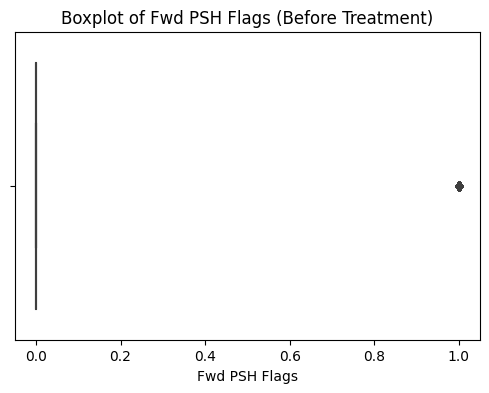

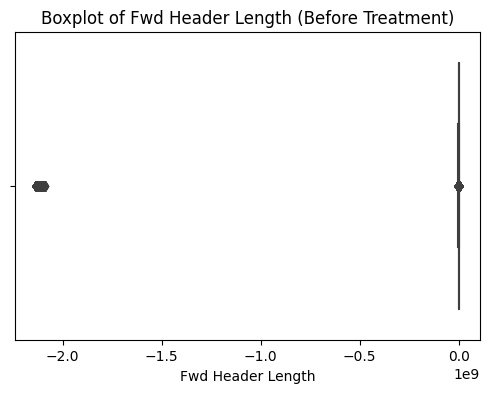

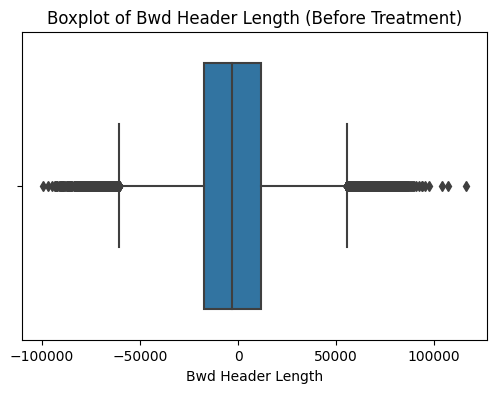

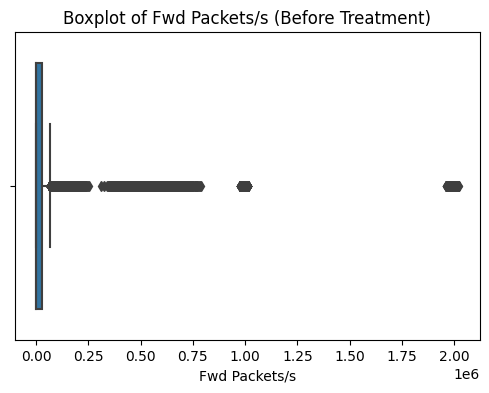

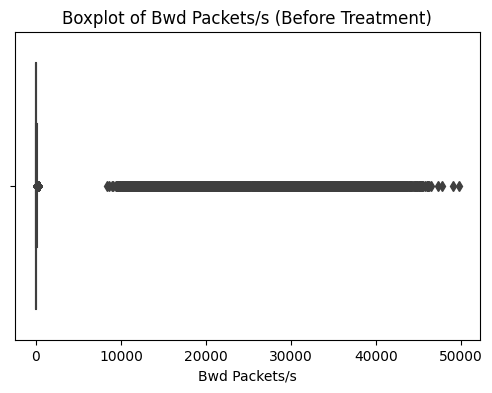

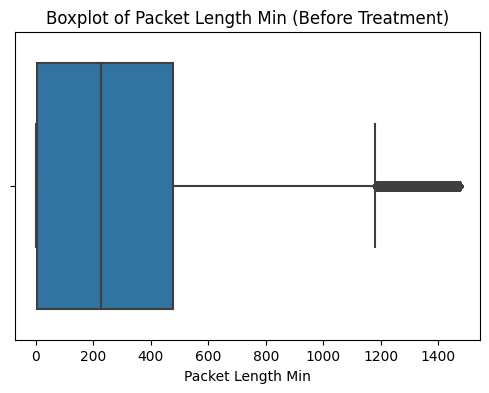

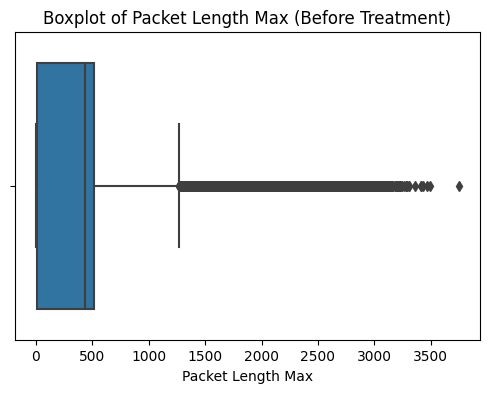

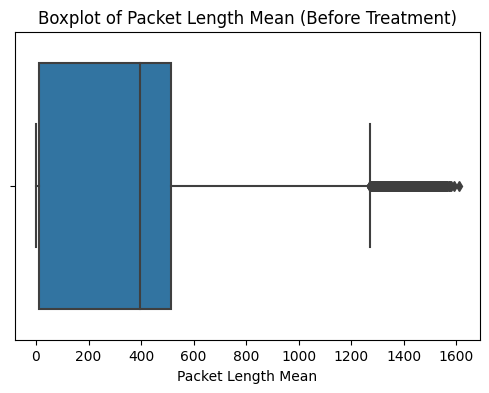

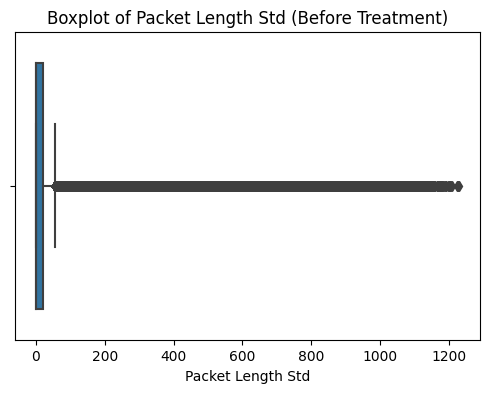

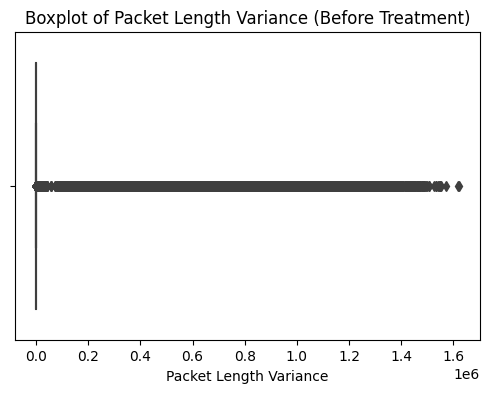

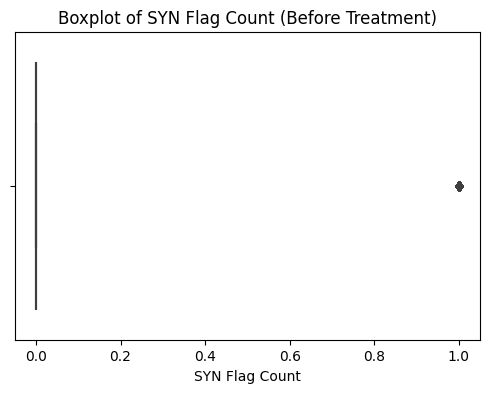

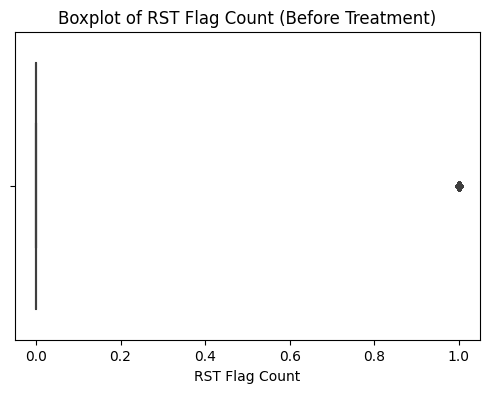

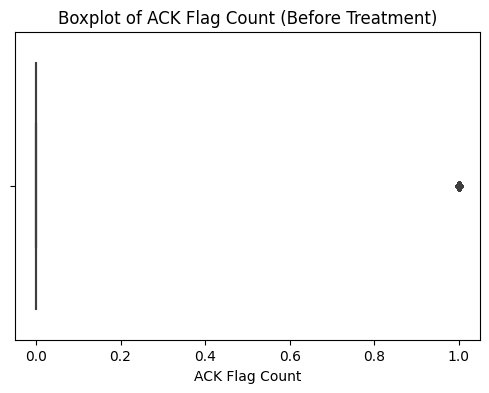

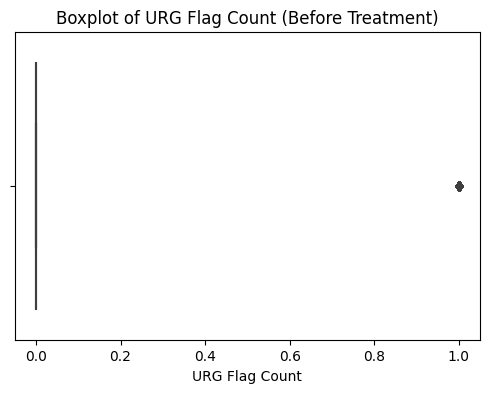

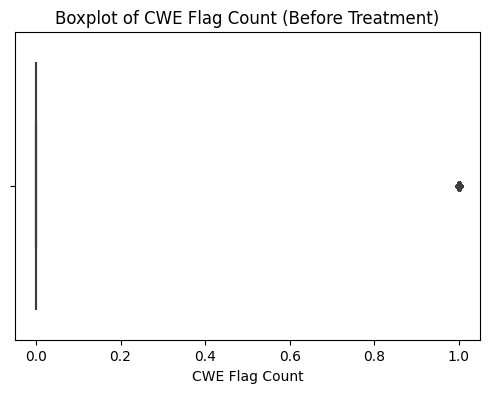

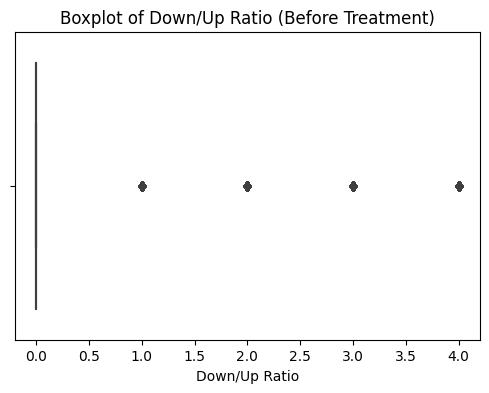

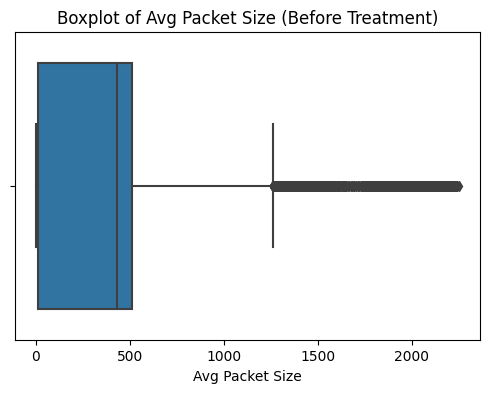

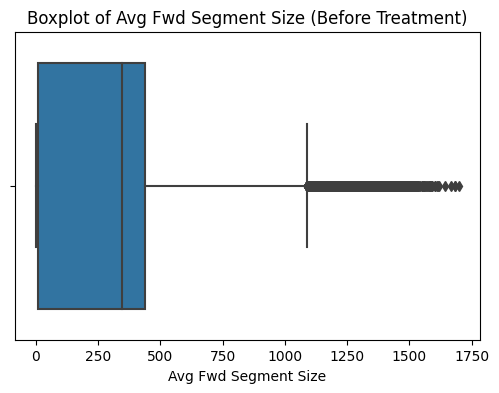

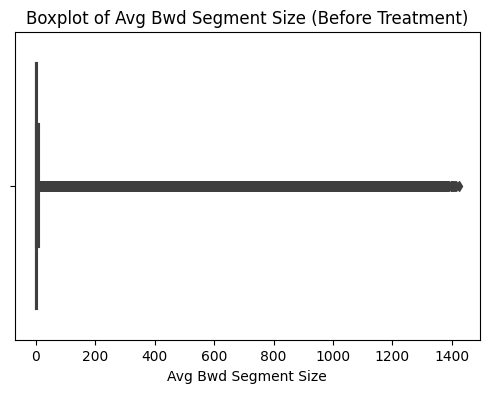

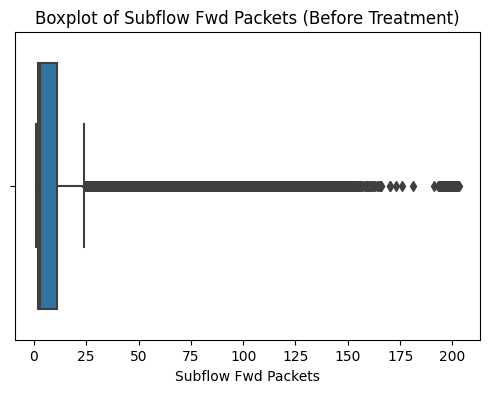

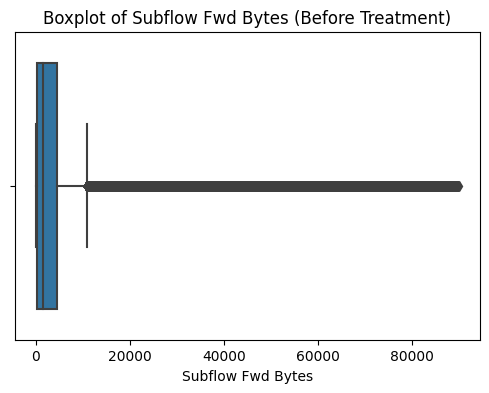

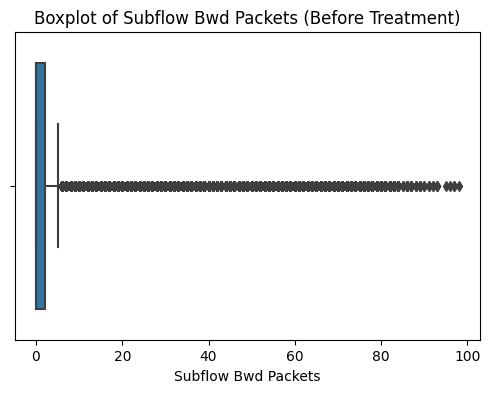

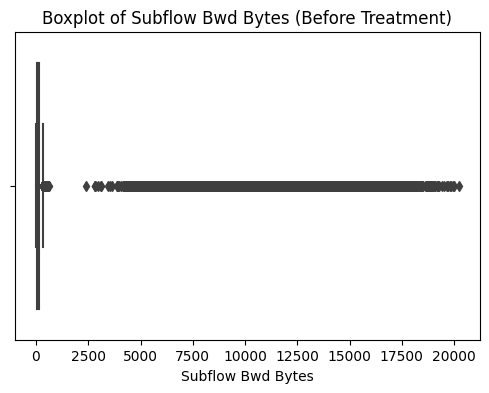

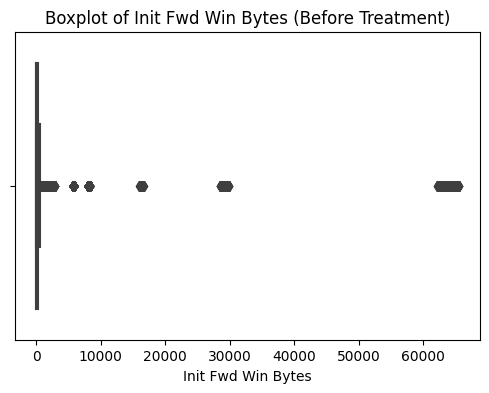

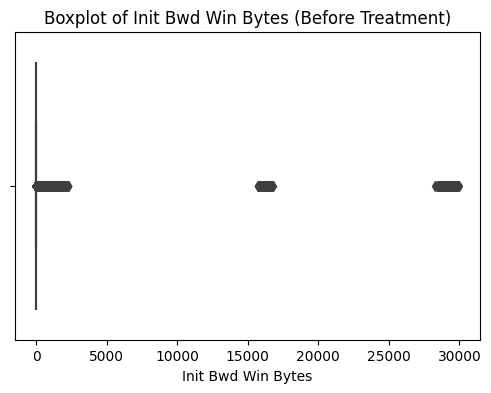

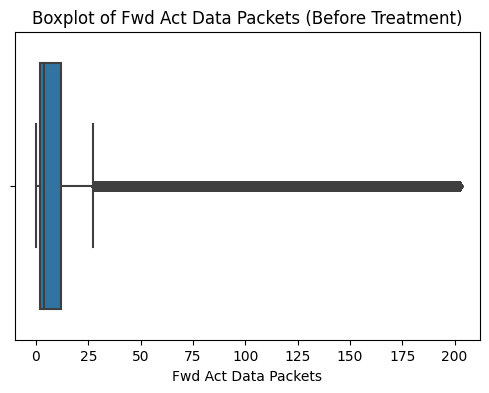

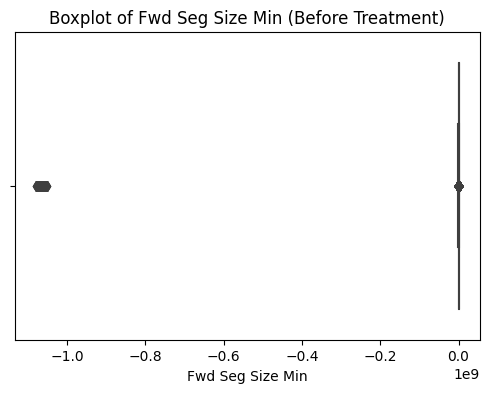

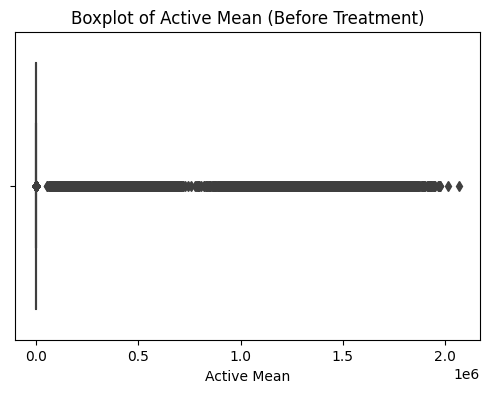

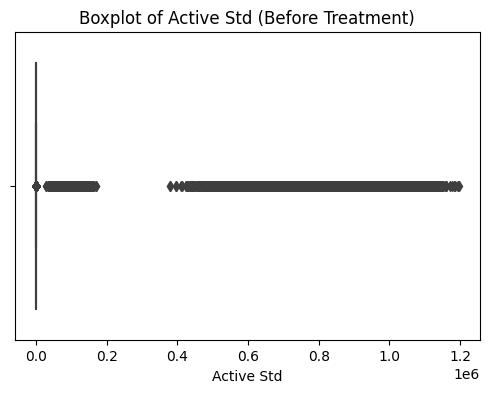

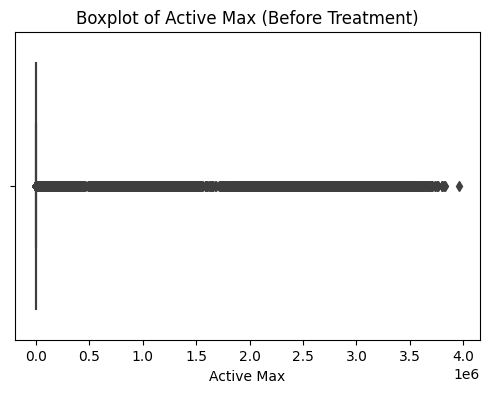

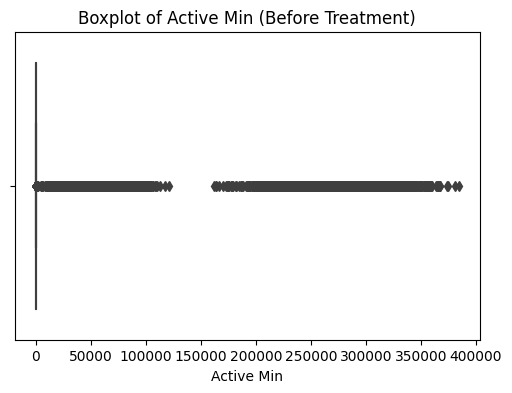

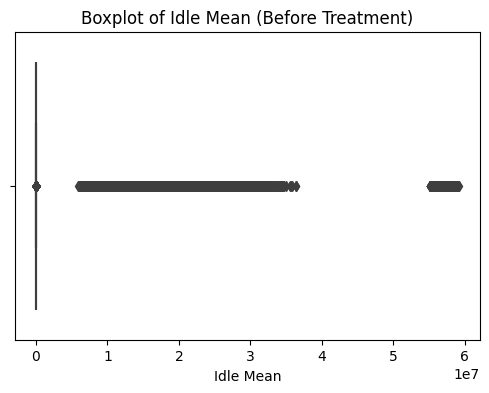

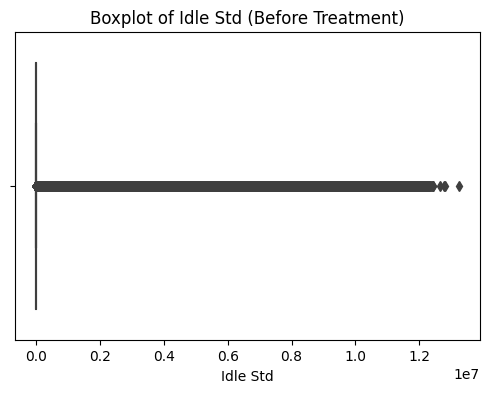

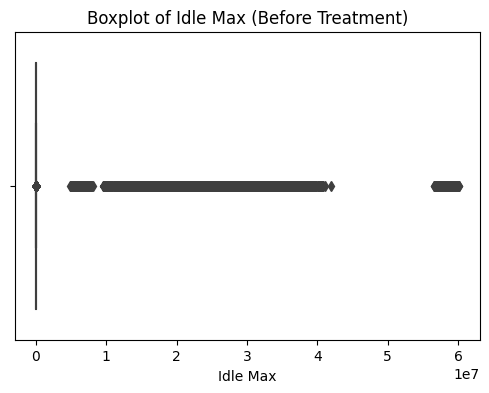

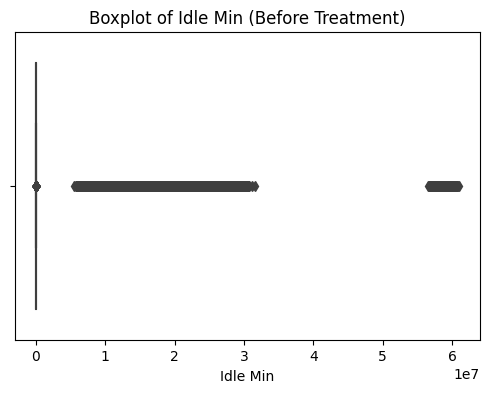

In [18]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import warnings

warnings.filterwarnings("ignore")

# 1. Boxplot to identify outliers (Before Treatment)
print("Boxplots BEFORE Outlier Treatment:")
for col in df.select_dtypes(include='number').columns:
    plt.figure(figsize=(6, 4))
    sns.boxplot(x=df[col])
    plt.title(f"Boxplot of {col} (Before Treatment)")
    plt.show()

In [19]:
# Function to calculate whiskers (IQR method)
def whisker(column_values):
    q1 = np.percentile(column_values, 25)
    q3 = np.percentile(column_values, 75)
    iqr = q3 - q1
    lower_whisker = q1 - 1.5 * iqr
    upper_whisker = q3 + 1.5 * iqr
    return lower_whisker, upper_whisker

# 2. Outlier Treatment for ALL numerical features
def outlier_treatment(df):
    df_copy = df.copy()  # Avoid modifying the original dataframe
    for col in df_copy.select_dtypes(include='number').columns:
        lw, uw = whisker(df_copy[col])
        df_copy[col] = np.where(df_copy[col] < lw, lw, df_copy[col])
        df_copy[col] = np.where(df_copy[col] > uw, uw, df_copy[col])
    return df_copy

# Apply IQR-based outlier treatment
df_cleaned = outlier_treatment(df)

Boxplots AFTER Outlier Treatment:


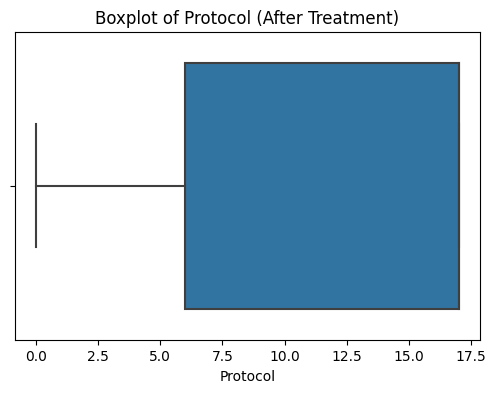

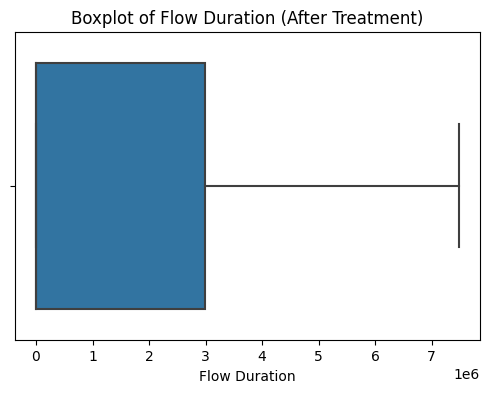

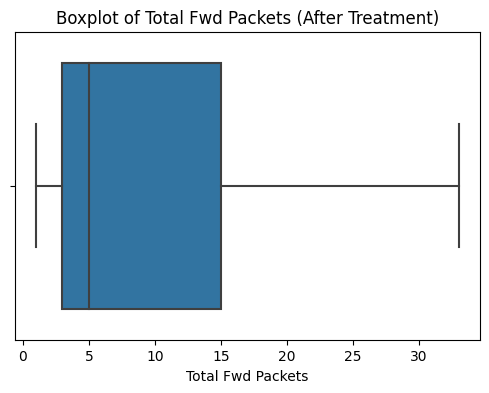

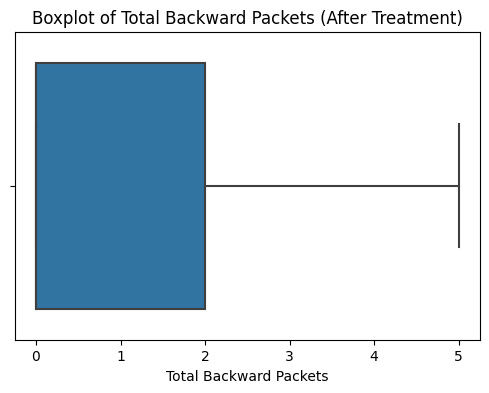

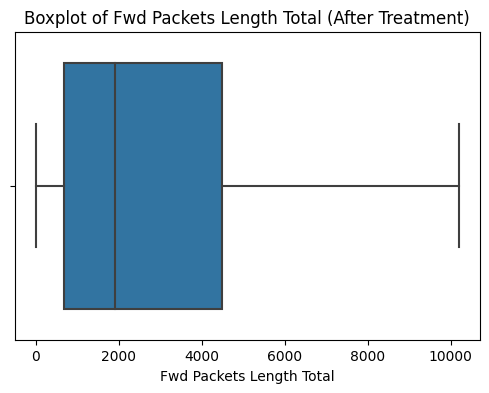

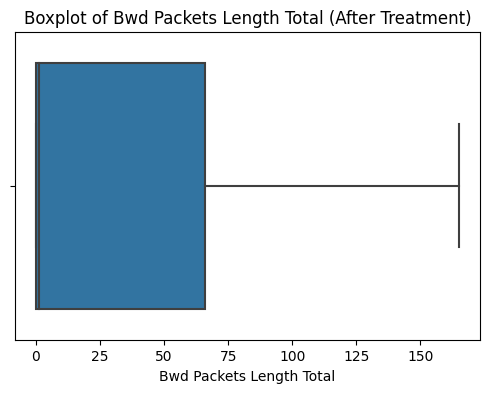

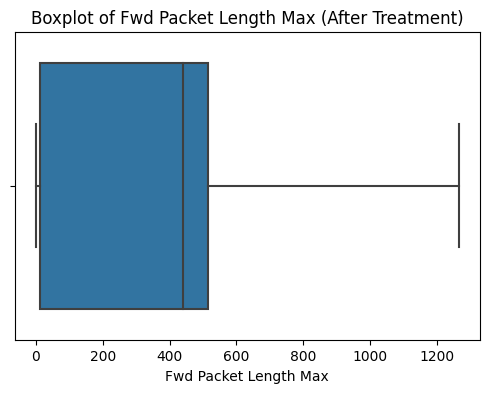

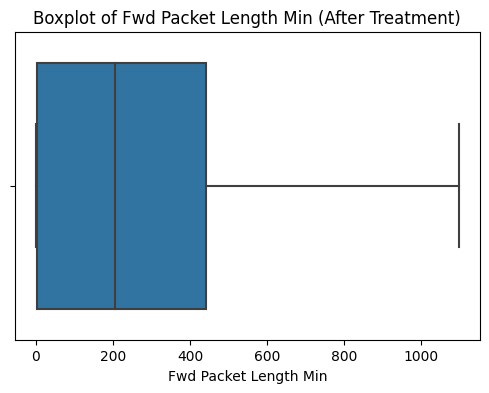

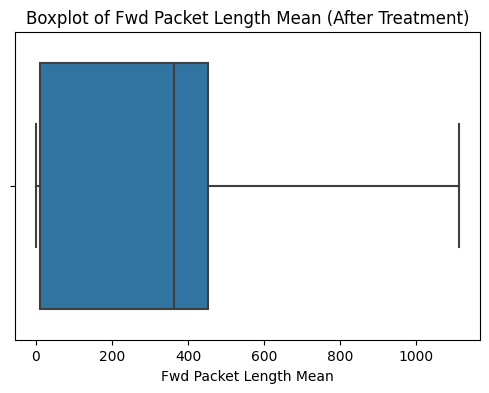

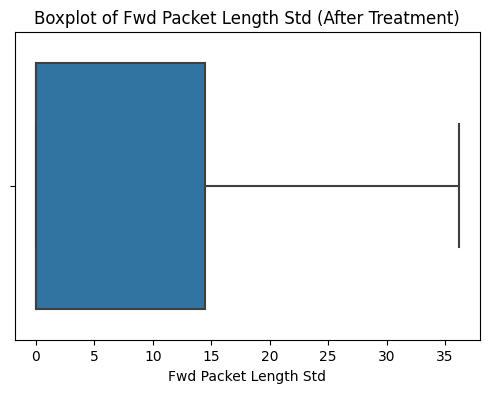

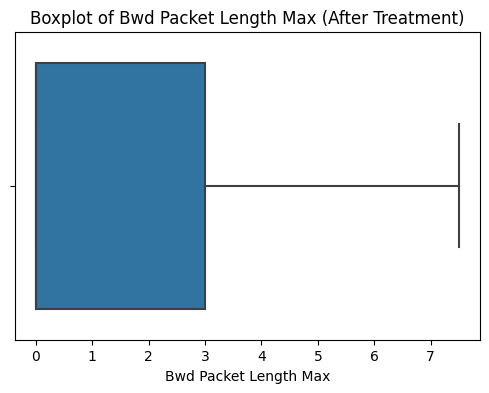

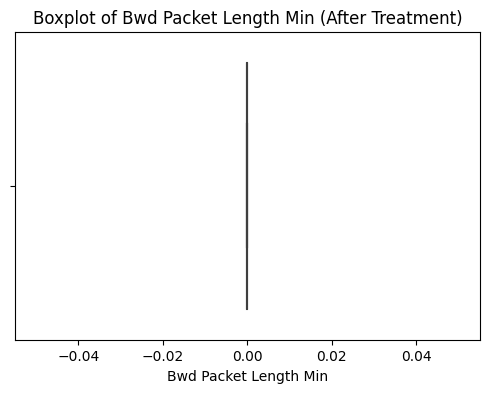

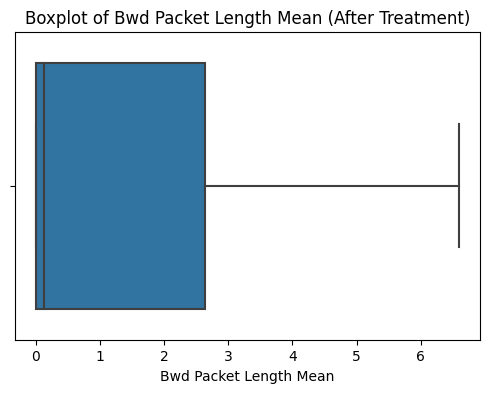

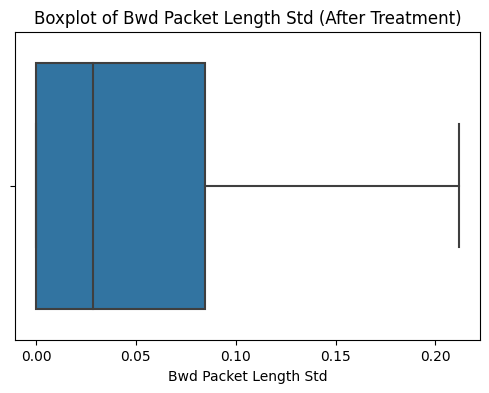

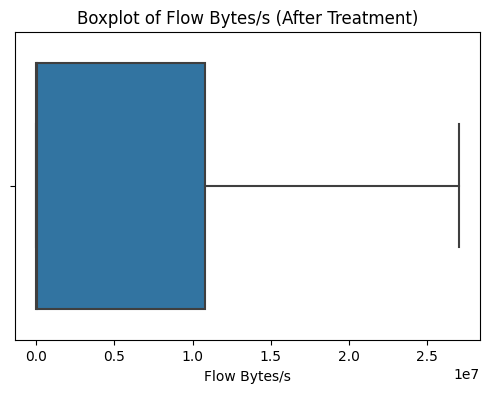

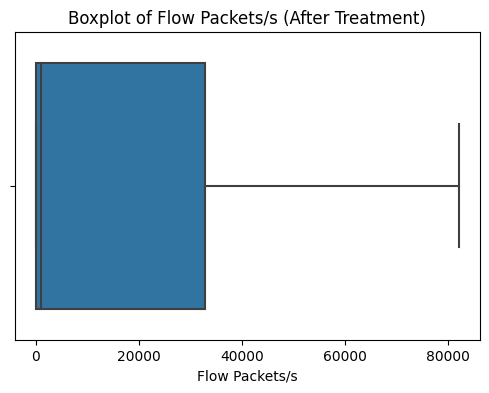

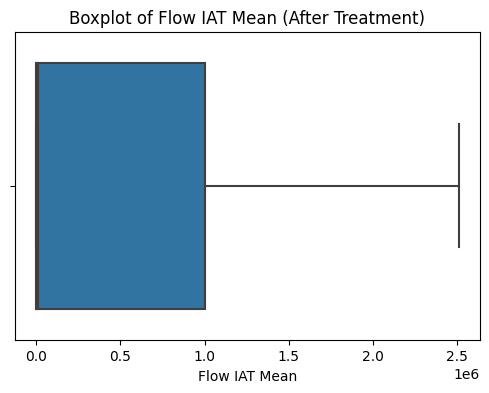

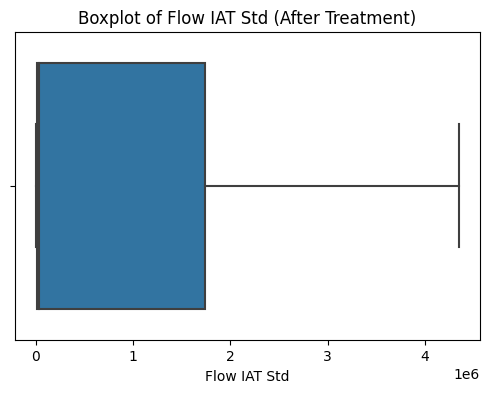

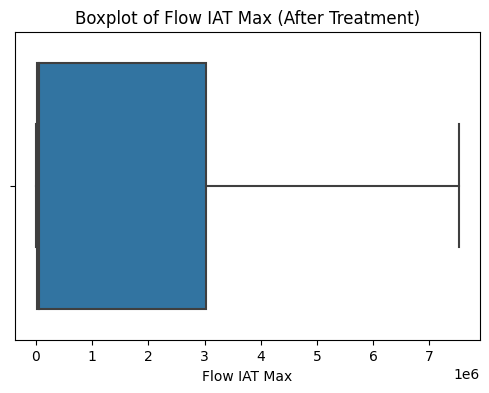

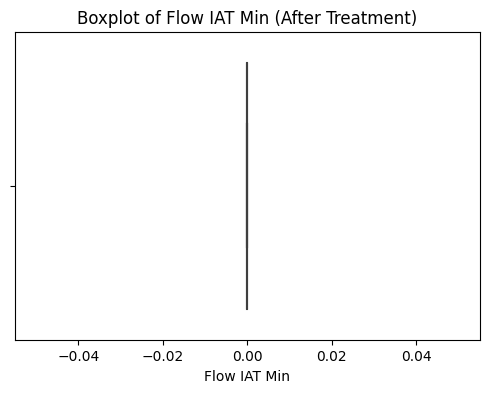

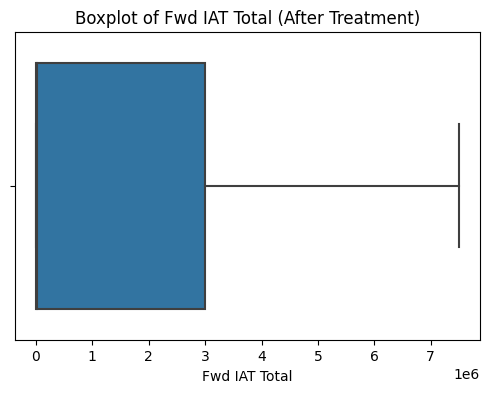

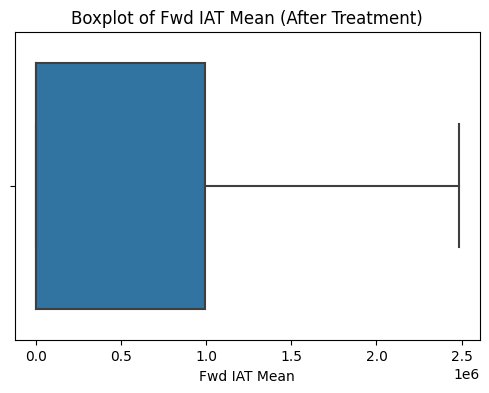

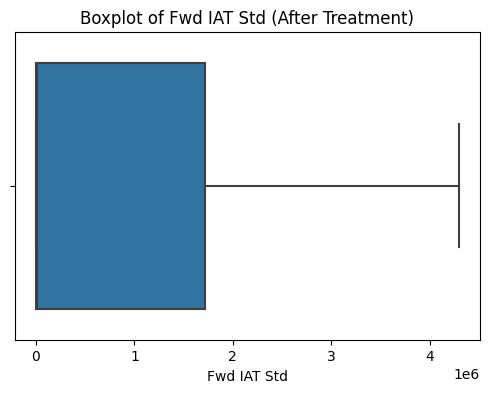

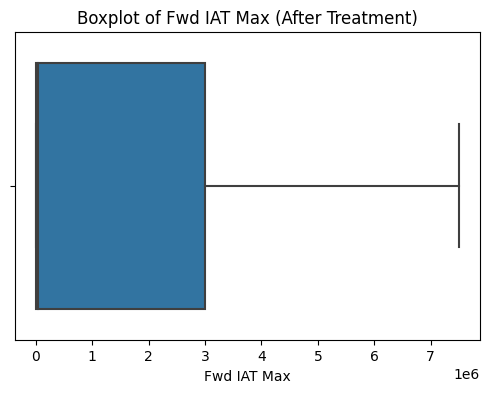

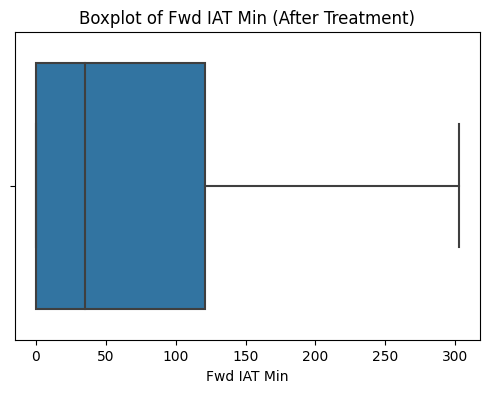

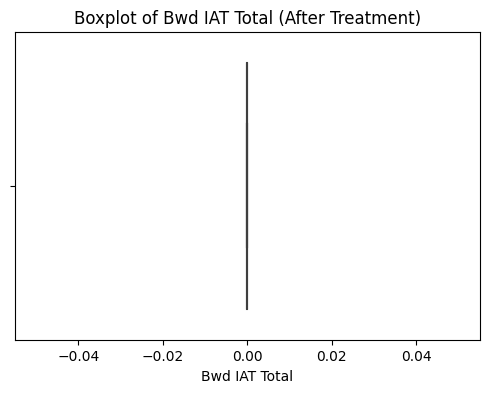

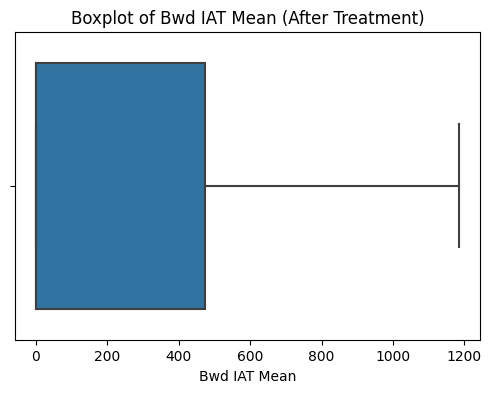

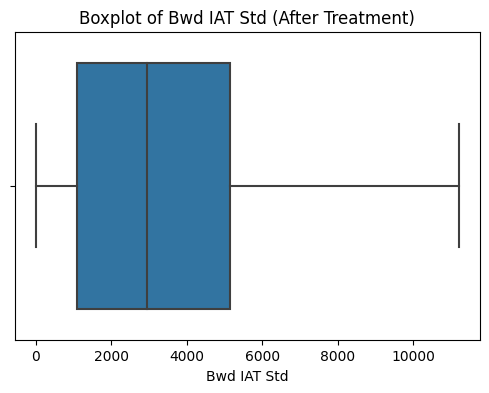

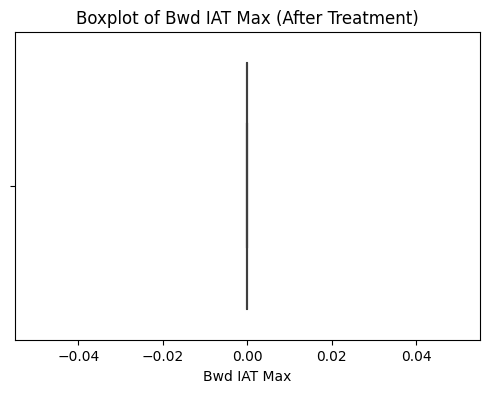

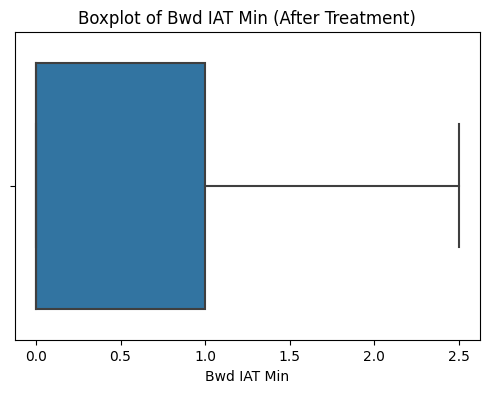

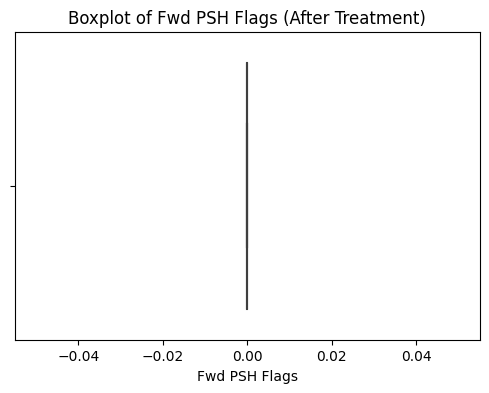

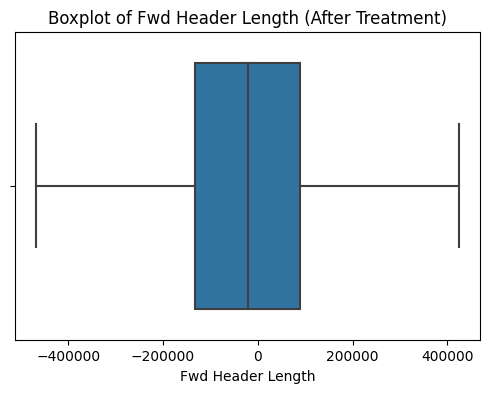

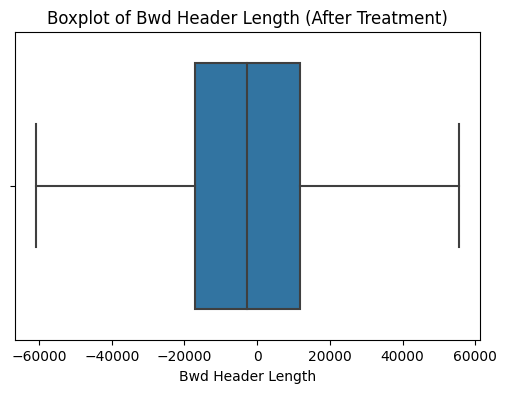

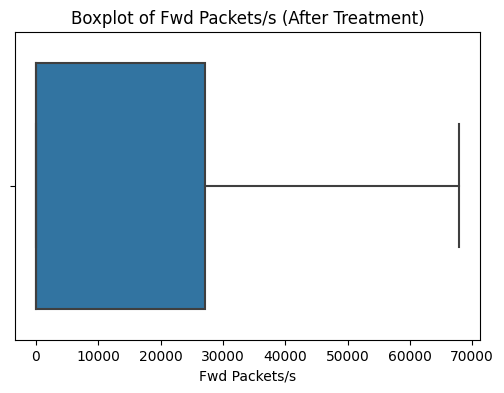

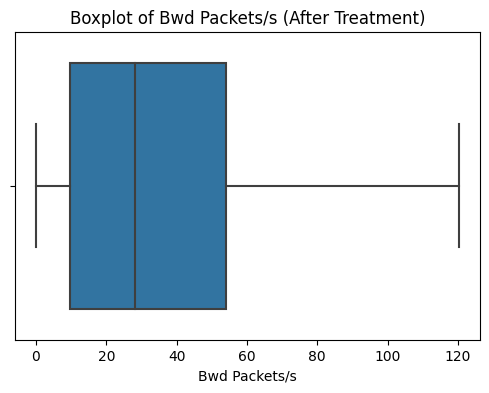

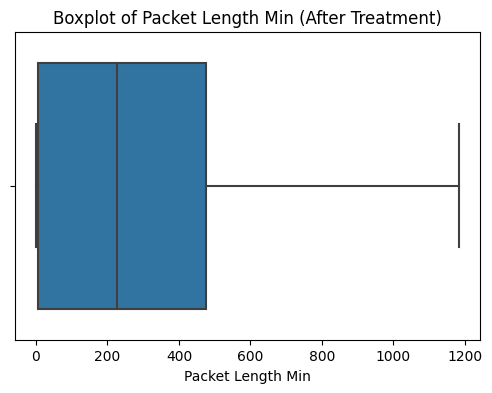

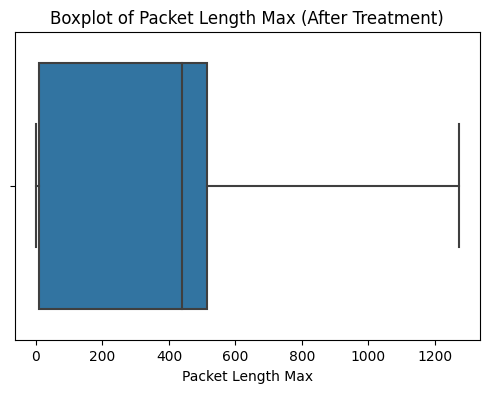

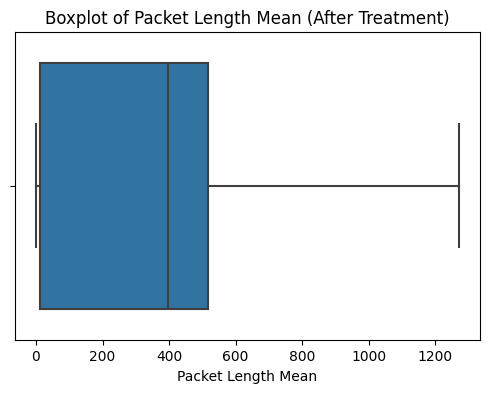

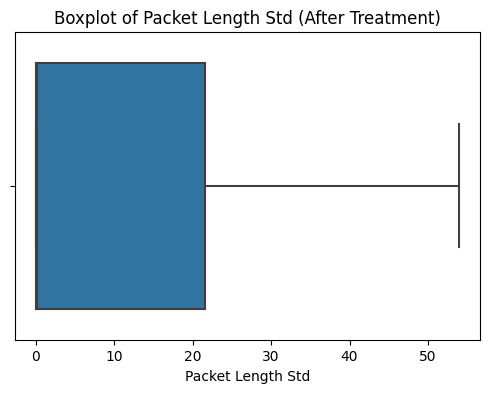

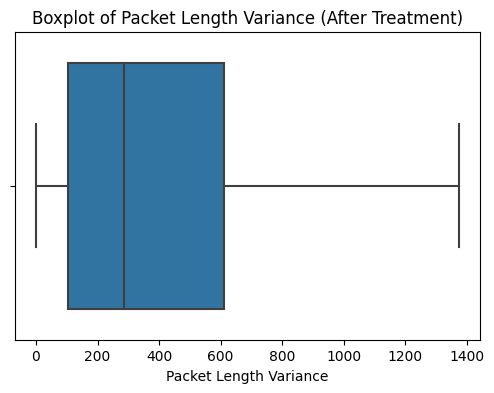

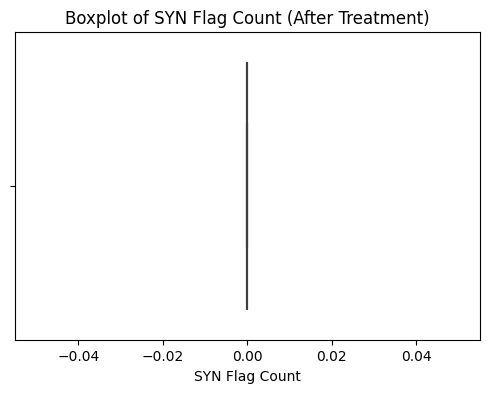

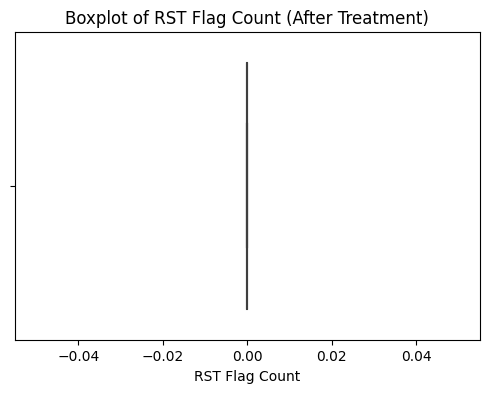

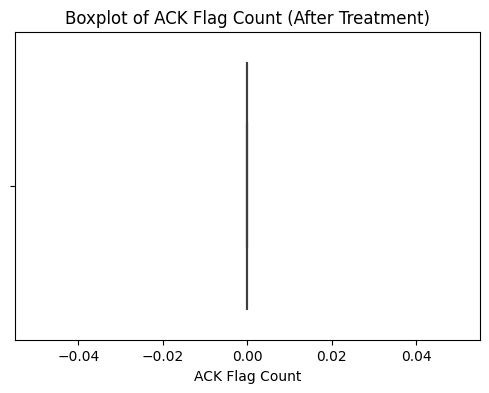

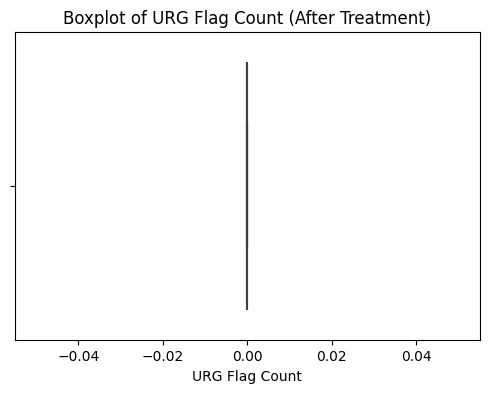

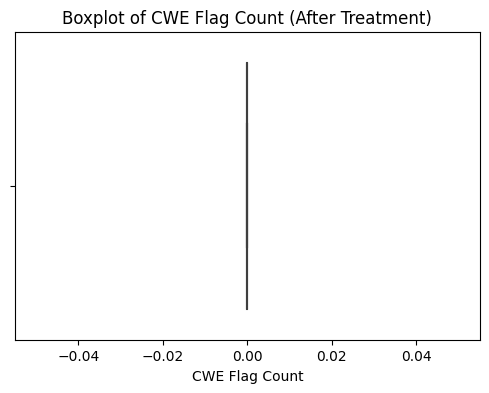

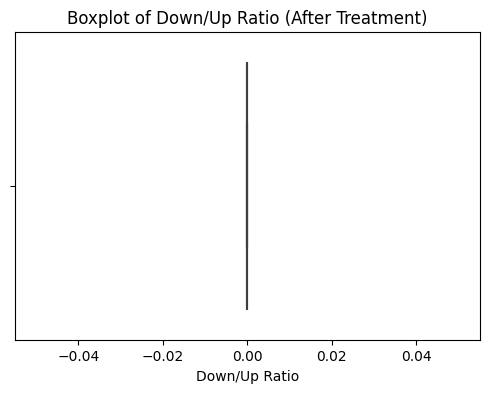

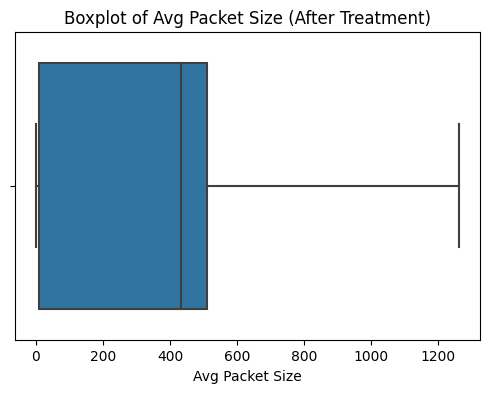

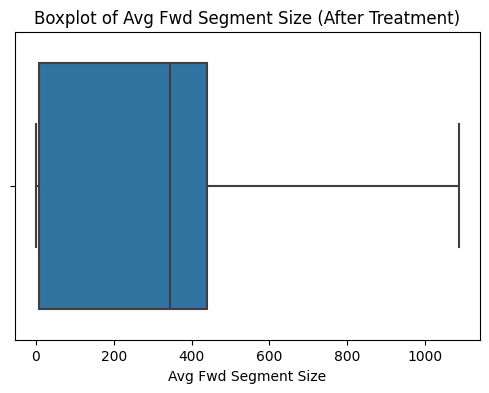

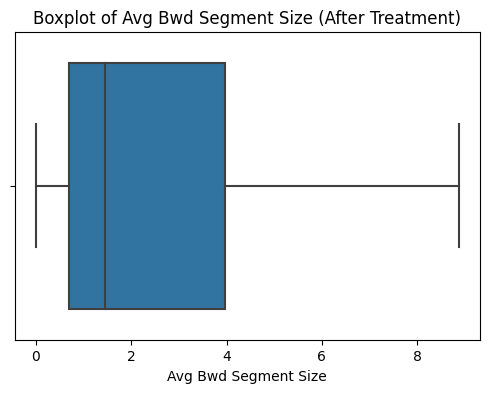

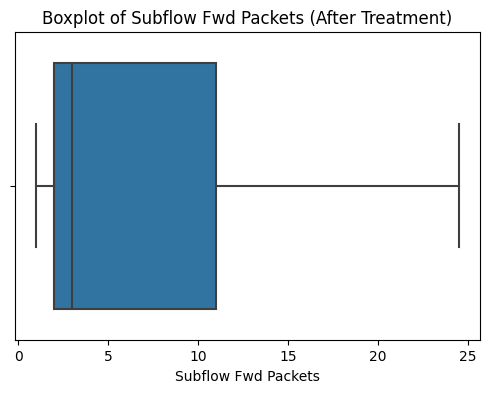

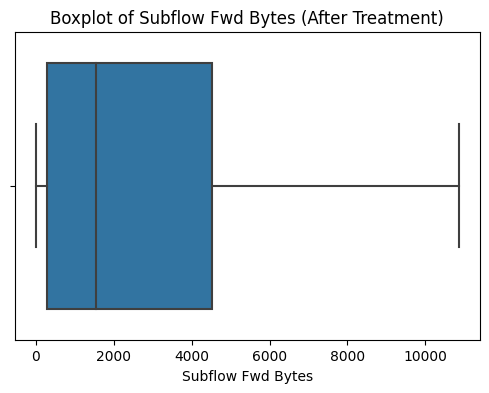

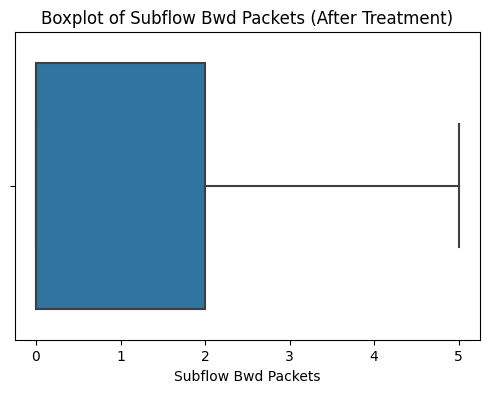

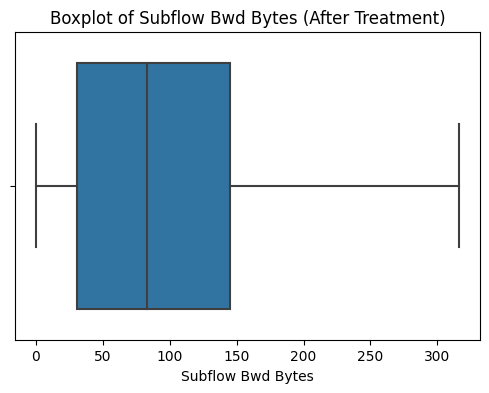

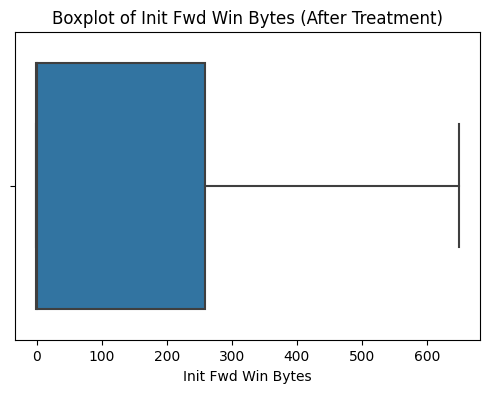

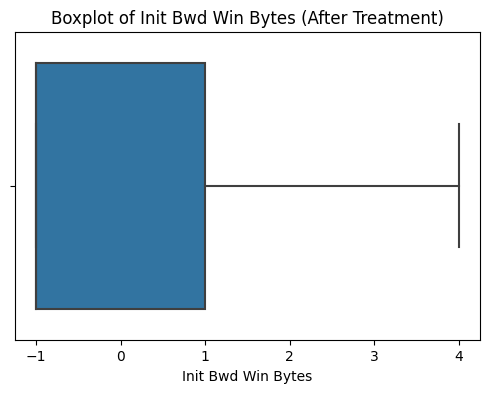

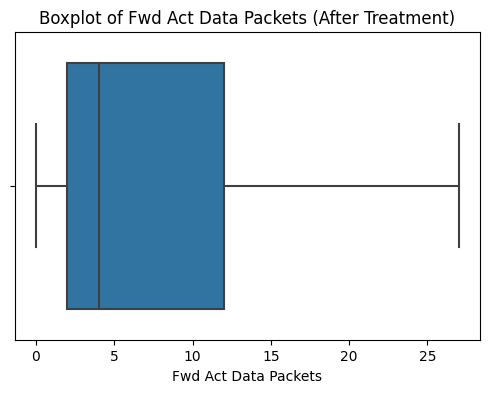

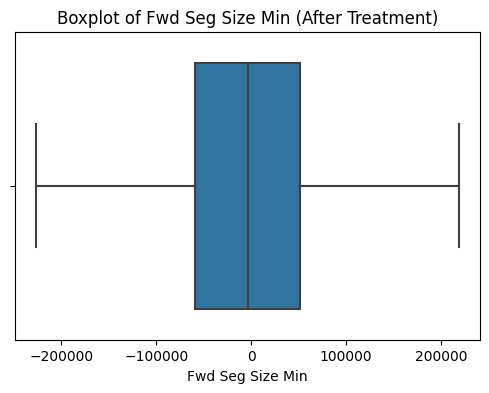

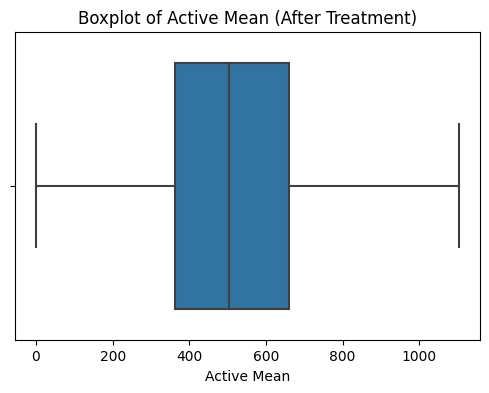

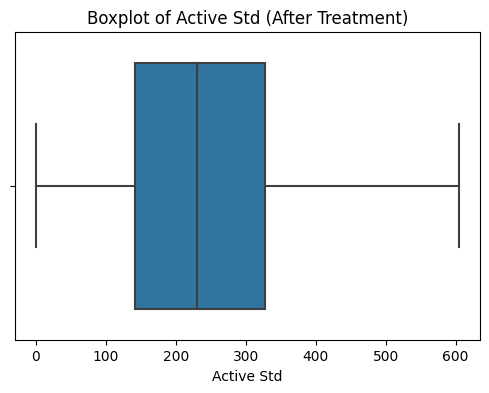

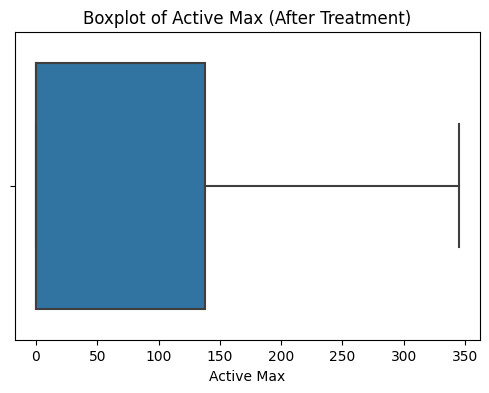

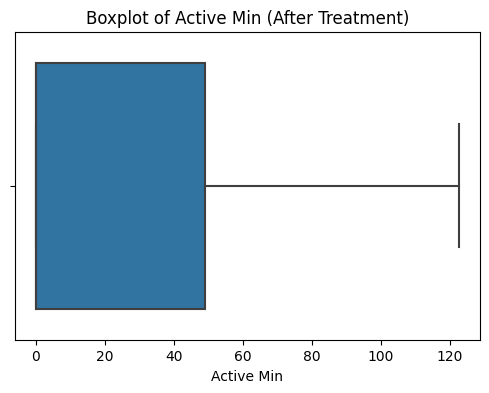

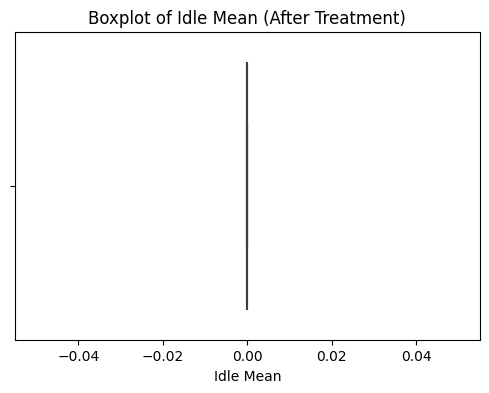

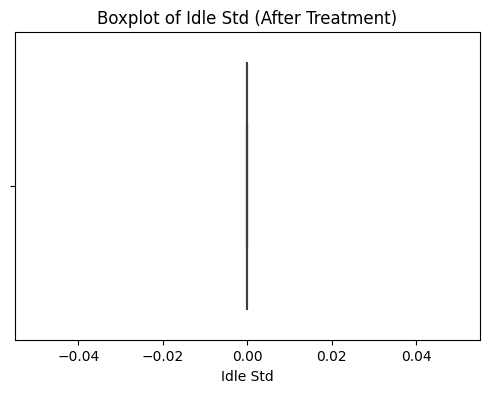

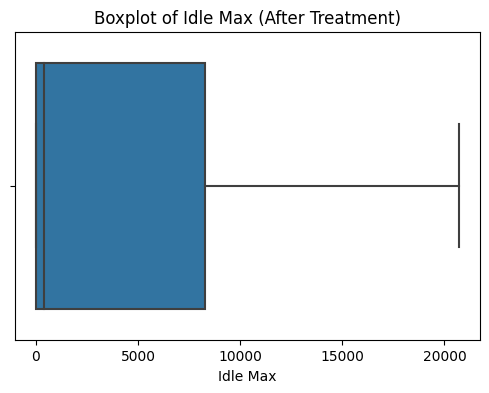

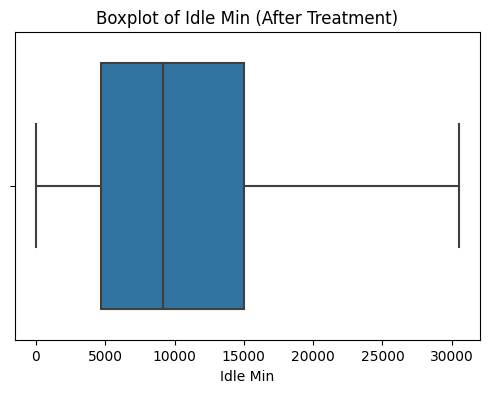


Outlier treatment completed using IQR method.


In [20]:
# 3. Boxplot to verify changes after treatment
print("Boxplots AFTER Outlier Treatment:")
for col in df_cleaned.select_dtypes(include='number').columns:
    plt.figure(figsize=(6, 4))
    sns.boxplot(x=df_cleaned[col])
    plt.title(f"Boxplot of {col} (After Treatment)")
    plt.show()

print("\nOutlier treatment completed using IQR method.")

In [21]:
# Label Encoder
from sklearn.preprocessing import StandardScaler, LabelEncoder

# Encode the binary target column 'Class' (Attack=0, Safe=1)
class_encoder = LabelEncoder()
df_cleaned['Class'] = class_encoder.fit_transform(df_cleaned['Class'])  

# Display the unique values of 'Class' after encoding
print("Encoded Class Values:")
print(df_cleaned['Class'].value_counts())

# Show the mapping of original labels to numerical values
print("\nLabel Mapping:")
label_mapping = dict(zip(class_encoder.classes_, class_encoder.transform(class_encoder.classes_)))
print(label_mapping)


# Separate features (X) and target (y)
X = df_cleaned.drop('Class', axis=1)
y = df_cleaned['Class']

Encoded Class Values:
Class
0    295135
1    136236
Name: count, dtype: int64

Label Mapping:
{'Attack': 0, 'Benign': 1}


In [22]:
# Split the data into training and testing sets
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [23]:
# Standard Scaling

# Scale the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [24]:
# Feature Selection
from sklearn.feature_selection import RFE
from sklearn.ensemble import RandomForestClassifier

# Initialize Random Forest for RFE
rf_estimator = RandomForestClassifier(n_jobs=-1, random_state=42)

# Apply RFE to select top features
rfe = RFE(estimator=rf_estimator, n_features_to_select=10)
X_train_selected = rfe.fit_transform(X_train_scaled, y_train)
X_test_selected = rfe.transform(X_test_scaled)

In [25]:
# Get the selected feature indices
selected_features = X_train.columns[rfe.support_]
print("Selected features:", selected_features)

rfe_features_df = pd.DataFrame({'Feature': list(X_train.columns), 'Ranking': rfe.ranking_})
rfe_features_df.sort_values(by='Ranking')

Selected features: Index(['Fwd Packet Length Min', 'Fwd Packet Length Mean', 'Flow IAT Mean',
       'Fwd IAT Mean', 'Packet Length Min', 'Packet Length Mean',
       'Avg Packet Size', 'Avg Fwd Segment Size', 'Avg Bwd Segment Size',
       'Init Fwd Win Bytes'],
      dtype='object')


,Feature,Ranking
16,Flow IAT Mean,1
53,Init Fwd Win Bytes,1
21,Fwd IAT Mean,1
37,Packet Length Mean,1
35,Packet Length Min,1
...,...,...
19,Flow IAT Min,52
30,Fwd PSH Flags,53
28,Bwd IAT Max,54
25,Bwd IAT Total,55


# Model Training Without Optimization

In [26]:
# Random Forest

# Train Random Forest with default hyperparameters
rf = RandomForestClassifier(n_estimators=100, max_depth=10, random_state=42)
rf.fit(X_train_selected, y_train)

RandomForestClassifier(max_depth=10, random_state=42)

In [27]:
# Classification Report
from sklearn.metrics import accuracy_score, classification_report

# Evaluate the model
y_pred = rf.predict(X_test_selected)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)
print("Classification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.964277021153289
Classification Report:
               precision    recall  f1-score   support

           0       0.97      0.97      0.97     58862
           1       0.94      0.94      0.94     27413

    accuracy                           0.96     86275
   macro avg       0.96      0.96      0.96     86275
weighted avg       0.96      0.96      0.96     86275



# Model Training with Optimization

In [28]:
 # TPE

from hyperopt import hp, tpe, fmin, Trials
from sklearn.model_selection import cross_val_score

# Define the objective function for TPE
def objective(params):
    rf = RandomForestClassifier(
        n_estimators=int(params['n_estimators']),
        max_depth=int(params['max_depth']),
        min_samples_split=int(params['min_samples_split']),
        random_state=42
    )
    score = cross_val_score(rf, X_train_selected, y_train, cv=5, scoring='accuracy').mean()
    return -score  # Minimize the negative accuracy


# Define the hyperparameter search space
search_space = {
    'n_estimators': hp.quniform('n_estimators', 50, 200, 10),
    'max_depth': hp.quniform('max_depth', 5, 50, 5),
    'min_samples_split': hp.quniform('min_samples_split', 2, 20, 1)
}

# Run TPE optimization
trials = Trials()
best_params = fmin(
    fn=objective,
    space=search_space,
    algo=tpe.suggest,
    max_evals=50,
    trials=trials
)

print("Best hyperparameters found:", best_params)

100%|██████████| 50/50 [8:22:36<00:00, 603.12s/trial, best loss: -0.963300068192075]   
Best hyperparameters found: {'max_depth': 30.0, 'min_samples_split': 19.0, 'n_estimators': 150.0}


In [29]:
# Random Forest

# Train the final Random Forest model with optimized hyperparameters
final_rf = RandomForestClassifier(
    n_estimators=int(best_params['n_estimators']),
    max_depth=int(best_params['max_depth']),
    min_samples_split=int(best_params['min_samples_split']),
    random_state=42
)
final_rf.fit(X_train_selected, y_train)

RandomForestClassifier(max_depth=30, min_samples_split=19, n_estimators=150,
                       random_state=42)

In [30]:
# Classification Report
from sklearn.metrics import accuracy_score, classification_report

# Evaluate the optimized model
y_pred = final_rf.predict(X_test_selected)
accuracy = accuracy_score(y_test, y_pred)
print("Optimized Model Accuracy:", accuracy)
print("Classification Report:\n", classification_report(y_test, y_pred))

Optimized Model Accuracy: 0.9648565633149812
Classification Report:
               precision    recall  f1-score   support

           0       0.97      0.98      0.97     58862
           1       0.95      0.94      0.94     27413

    accuracy                           0.96     86275
   macro avg       0.96      0.96      0.96     86275
weighted avg       0.96      0.96      0.96     86275



# Final Evaluation

In [33]:
import pandas as pd

# Creating a DataFrame to compare model performance
models = ['Random Forest without Optimization', 'Random Forest with Optimization']
train_accuracies = [rf.score(X_train_selected, y_train), final_rf.score(X_train_selected, y_train)]
test_accuracies = [accuracy, accuracy_score(y_test, final_rf.predict(X_test_selected))]

# Creating the results DataFrame
results = pd.DataFrame({
    'ML Model': models,
    'Train Accuracy': train_accuracies,
    'Test Accuracy': test_accuracies
})

# Sorting by test accuracy
#results.sort_values(by=['Test Accuracy', 'Train Accuracy'], ascending=False, inplace=True)

# Display results
print(results)

                             ML Model  Train Accuracy  Test Accuracy
0  Random Forest without Optimization        0.966137       0.964857
1     Random Forest with Optimization        0.976919       0.964857


# Saving in PKL

In [34]:
# Save the best performing model
import joblib

# Determine the best model based on test accuracy
best_model = final_rf if test_accuracies[1] > test_accuracies[0] else rf

# Save the best model
joblib.dump(best_model, 'best_rf_model.pkl')

print("Best performing model saved as 'best_rf_model.pkl'")

Best performing model saved as 'best_rf_model.pkl'
